In [1]:
# Classifiers Models
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from collections import Counter
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
RandomForestClassifier, VotingClassifier, HistGradientBoostingClassifier, StackingClassifier)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report)

# Display all columns
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Option 1: Let pandas detect columns automatically
# First, check what the actual structure looks like
df = pd.read_csv('telco_prep.csv', index_col=0)
#print(df.columns)
display(df.head())

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  Churn                                        PromptInput                                   CustomerFeedback  feedback_length  sentiment
0  7590-vhveg  female              0     yes         no       1           no  no phone service             dsl             no          yes               no          no          no              no  month-to-month              yes           electronic check           29.85         29.85      0  write a realistic customer feedback based on t...  i have been using the dsl internet service fro...              401   0.129545
1  5575-gnvde    male              0      no         no      34          yes                no             dsl            yes           no              yes          no          no              no        one year               no               mailed check           56.95       1889.50      0  write a realistic customer feedback based on t...  i have been a customer with this company for o...              399   0.170833
2  3668-qpybk    male              0      no         no       2          yes                no             dsl            yes          yes               no          no          no              no  month-to-month              yes               mailed check           53.85        108.15      1  write a realistic customer feedback based on t...  i recently signed up for dsl internet service ...              482  -0.228571
3  7795-cfocw    male              0      no         no      45           no  no phone service             dsl            yes           no              yes         yes          no              no        one year               no  bank transfer (automatic)           42.30       1840.75      0  write a realistic customer feedback based on t...  i have been a loyal customer with this company...              406   0.215801
4  9237-hqitu  female              0      no         no       2          yes                no     fiber optic             no           no               no          no          no              no  month-to-month              yes           electronic check           70.70        151.65      1  write a realistic customer feedback based on t...  i recently switched to this fiber optic intern...              418   0.030000

In [3]:
# Lowering columns
df.columns = df.columns.str.lower()

In [4]:
# Rename columns
df.rename(columns={'customerid':'customer_id', 'seniorcitizen':'senior_citizen', 
                   'phoneservice':'phone_service', 'multiplelines':'multiple_lines',
                   'internetservice':'internet_service', 'onlinesecurity':'online_security',
                   'onlinebackup':'online_backup', 'deviceprotection':'device_protection',
                   'techsupport':'tech_support', 'streamingtv':'streaming_tv', 
                   'streamingmovies':'streaming_movies', 'paperlessbilling':'paperless_billing', 
                   'paymentmethod':'payment_method', 'monthlycharges':'monthly_charges',
                   'totalcharges':'total_charges', 'promptinput':'prompt_input', 
                   'customerfeedback':'customer_feedback'}, inplace=True)

In [6]:
df1 = df.copy()

In [7]:
df.drop(columns=['customer_id', 'prompt_input', 'customer_feedback', 'feedback_length', 
                'sentiment'], axis=1, inplace=True)

In [8]:
# Data Integrity Check
print("Big Query Statistics:")
print('-' * 127)
print(f"🚣‍♀️ DataFrame Shape: {df.shape}")
print('-' * 127)
print(f"Columns to list:\n{df.columns.tolist()}")
print('-' * 127)
print(f"📊 DataFrame Info: {df.info(memory_usage='deep')}")
print('-' * 127)
print(f"📈 DataFrame Distribution:\n {df.describe()}")
print('-' * 127)

missing_values = df.isna().sum()
#today_date = datetime.date.today() #+ datetime.timedelta(days=2) # test function works
#date_count = pd.DataFrame(jobs_all.date_time.dt.date.value_counts())
#missing_dates = list(pd.date_range(start=first_date, end=today_date).difference(date_count.index))
if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing values for df:\n{missing_values}")

print('-' * 127)

Big Query Statistics:
-------------------------------------------------------------------------------------------------------------------------------
🚣‍♀️ DataFrame Shape: (7032, 20)
-------------------------------------------------------------------------------------------------------------------------------
Columns to list:
['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn']
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender           

In [11]:
# Value_counts - Unique
objects = df.select_dtypes(include=['object','category'])
for col in objects.columns:
    #print(f"\n{col}:")
    print(f"{'='*127}")
    print(df[col].value_counts())

gender
male      3549
female    3483
Name: count, dtype: int64
partner
no     3639
yes    3393
Name: count, dtype: int64
dependents
no     4933
yes    2099
Name: count, dtype: int64
phone_service
yes    6352
no      680
Name: count, dtype: int64
multiple_lines
no                  3385
yes                 2967
no phone service     680
Name: count, dtype: int64
internet_service
fiber optic    3096
dsl            2416
no             1520
Name: count, dtype: int64
online_security
no                     3497
yes                    2015
no internet service    1520
Name: count, dtype: int64
online_backup
no                     3087
yes                    2425
no internet service    1520
Name: count, dtype: int64
device_protection
no                     3094
yes                    2418
no internet service    1520
Name: count, dtype: int64
tech_support
no                     3472
yes                    2040
no internet service    1520
Name: count, dtype: int64
streaming_tv
no                   

In [12]:
df.to_csv('telco_prep_clean.csv', index=False)

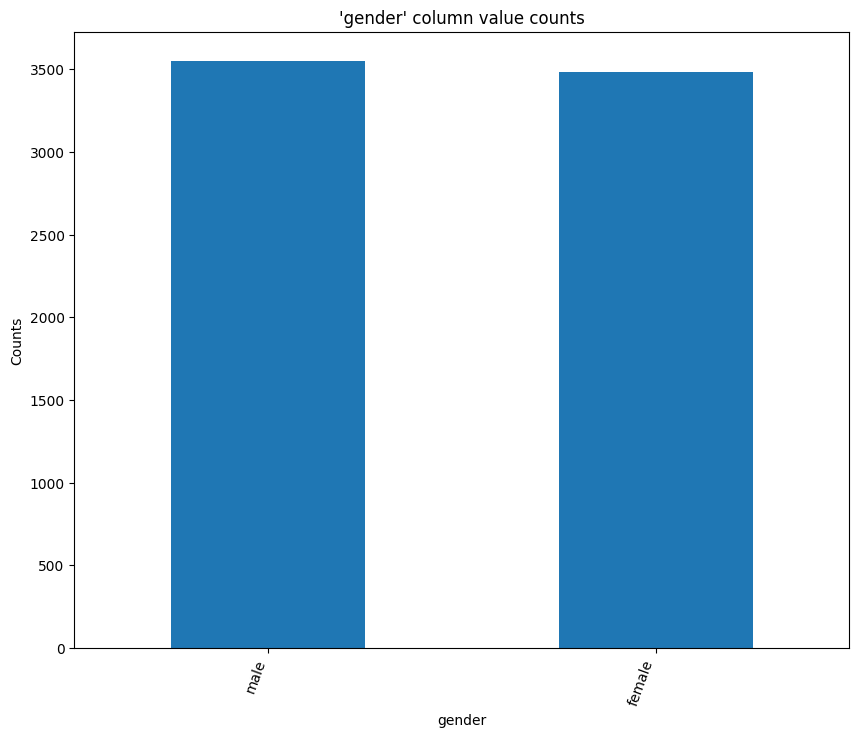

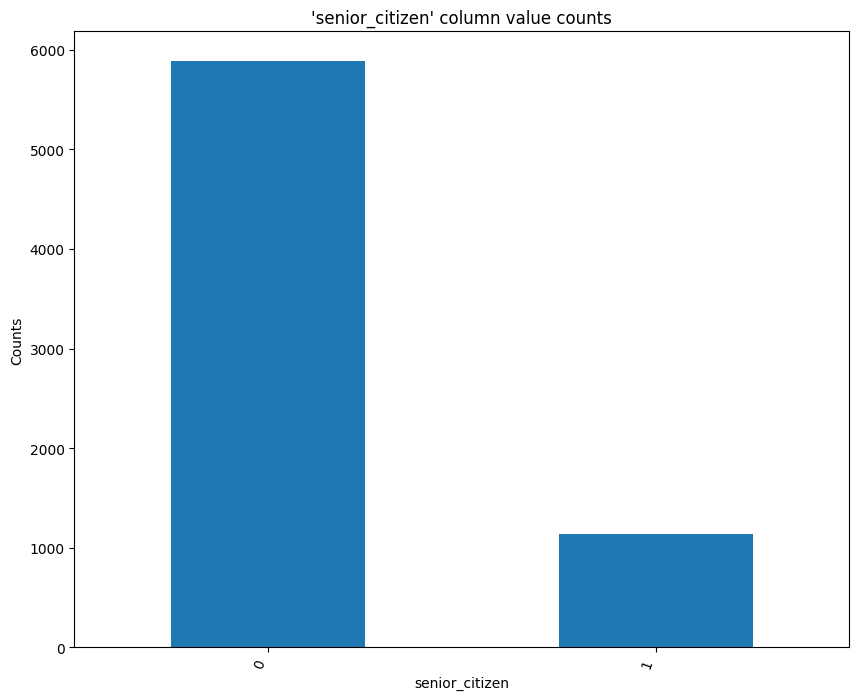

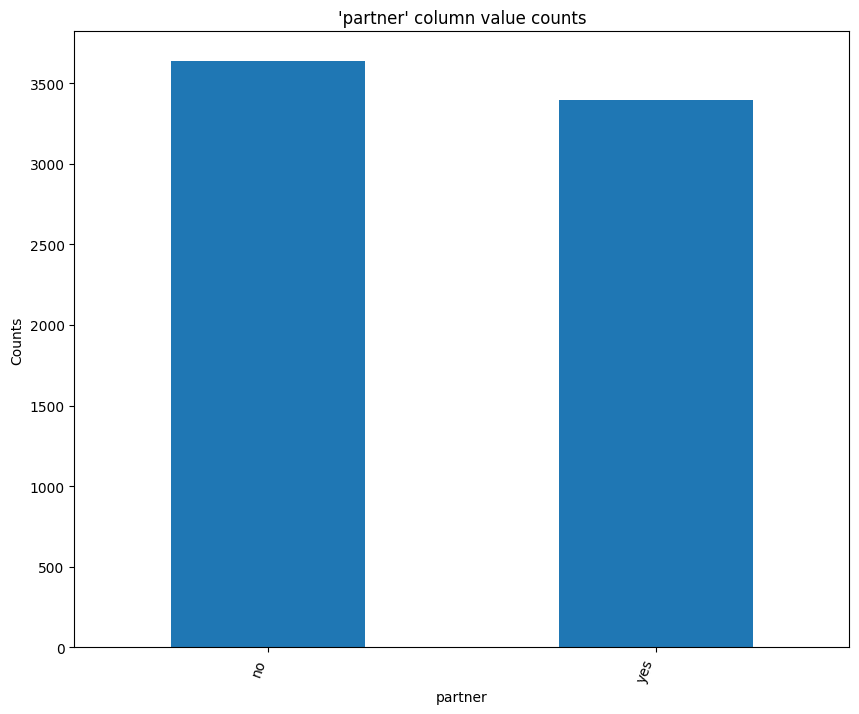

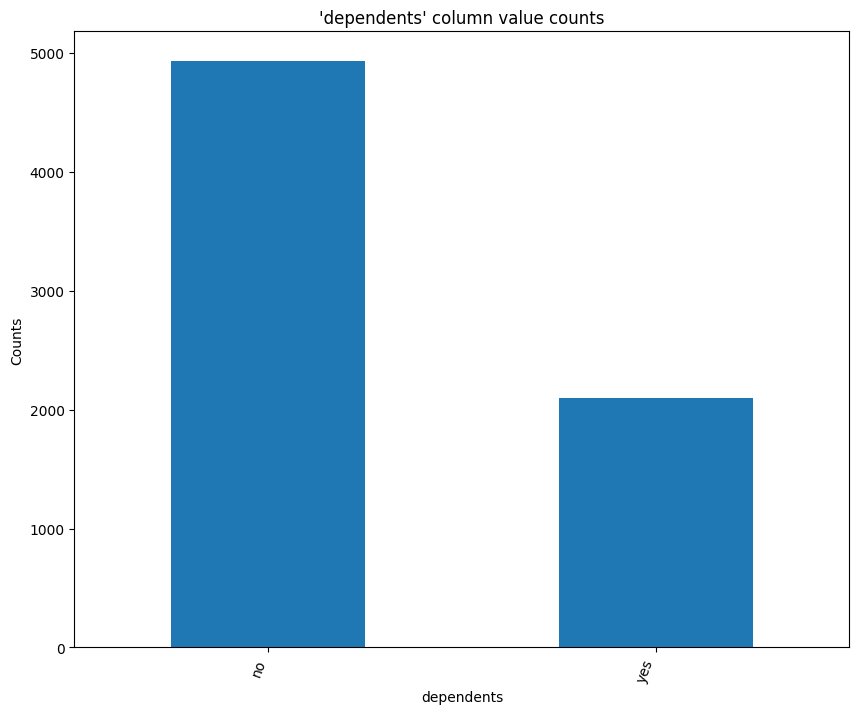

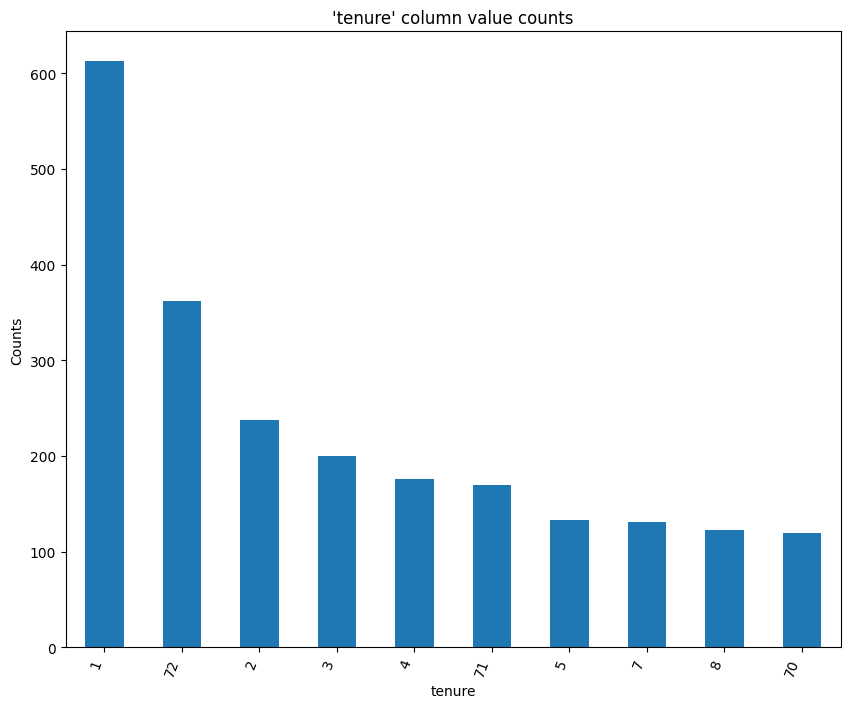

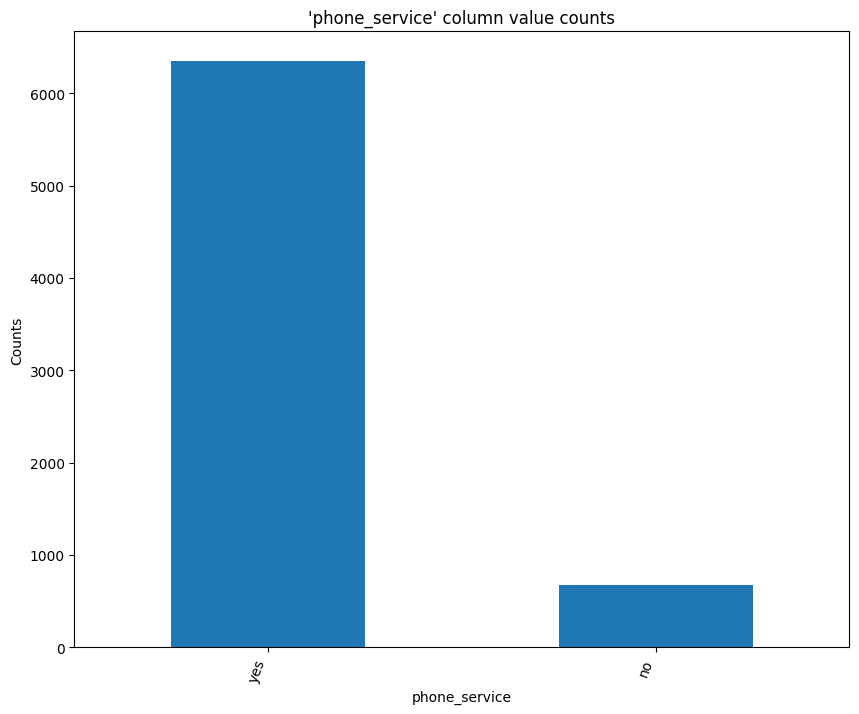

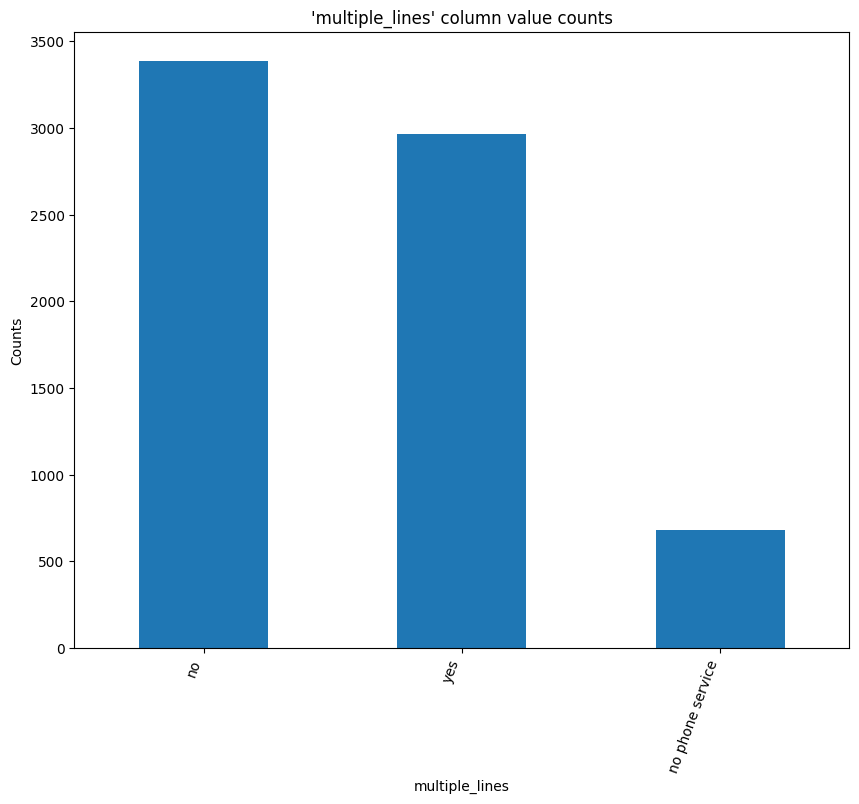

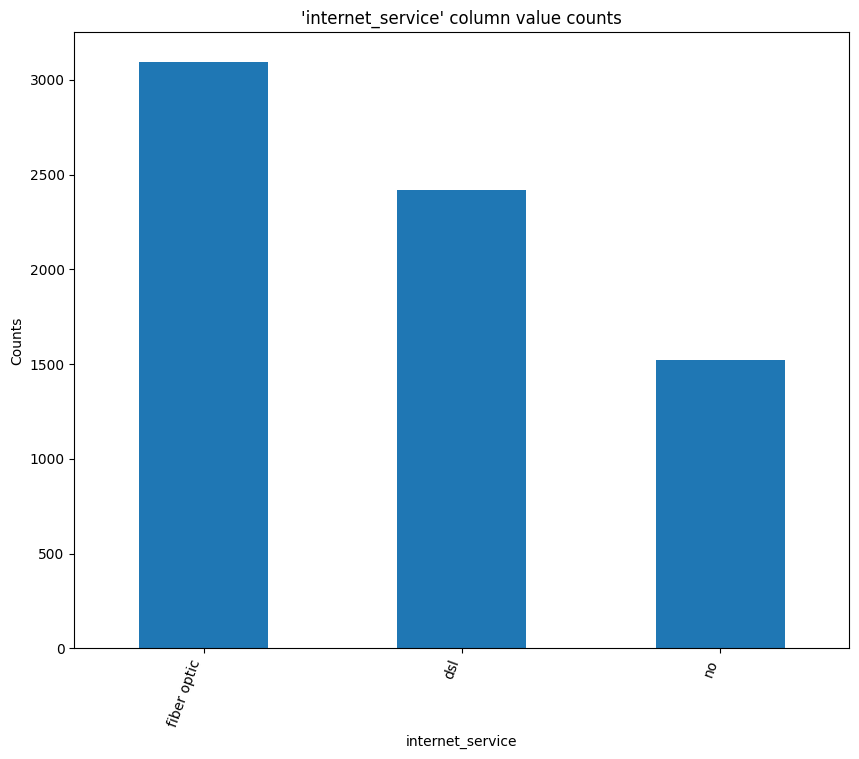

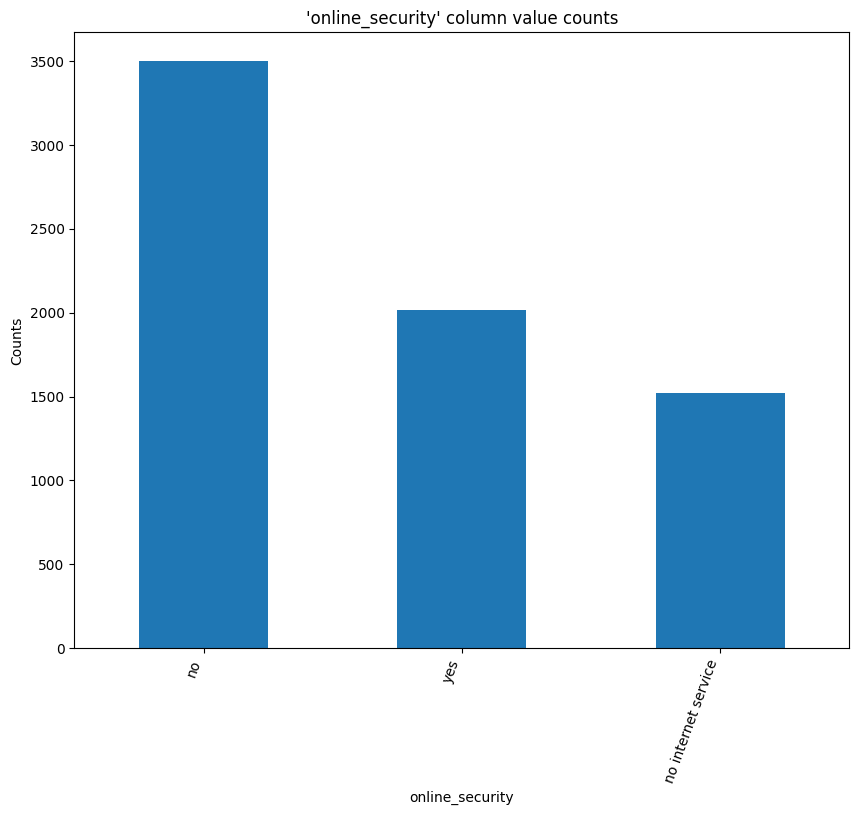

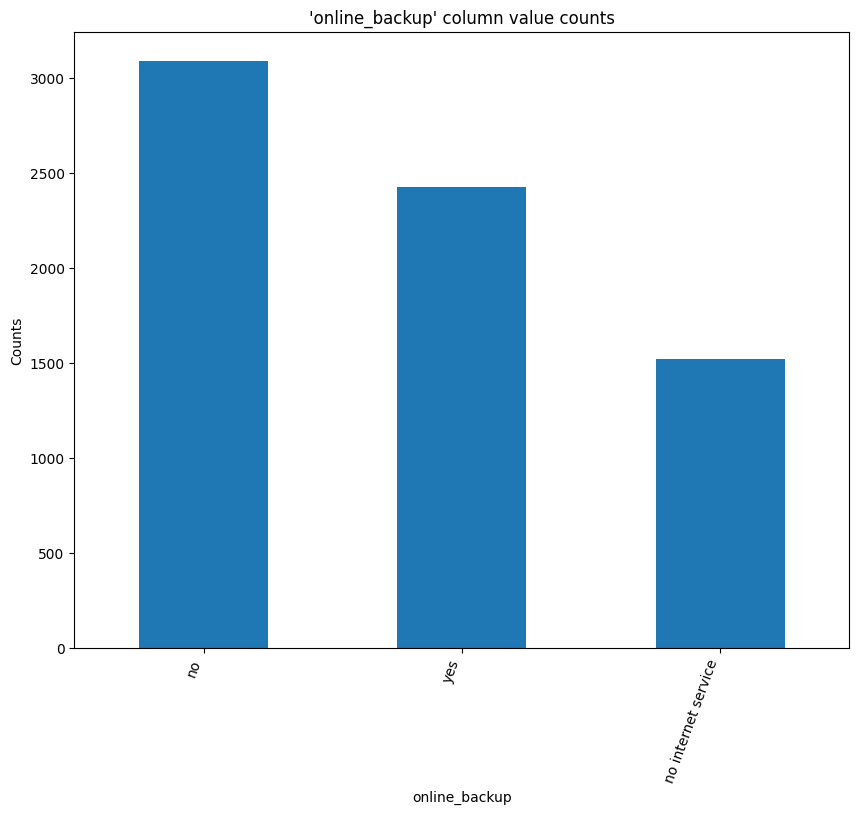

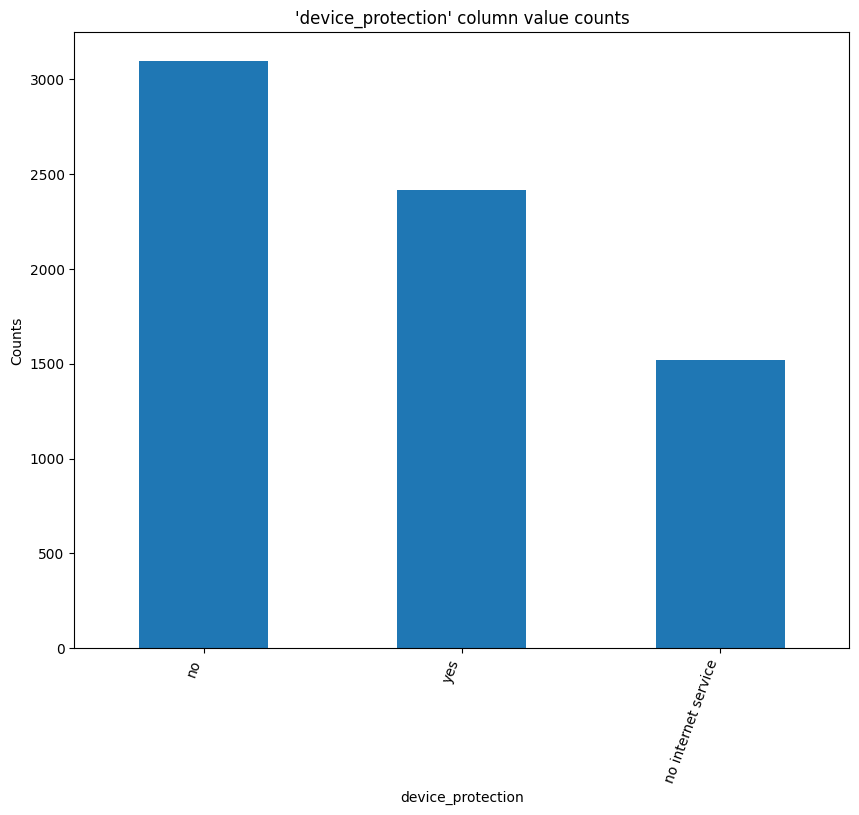

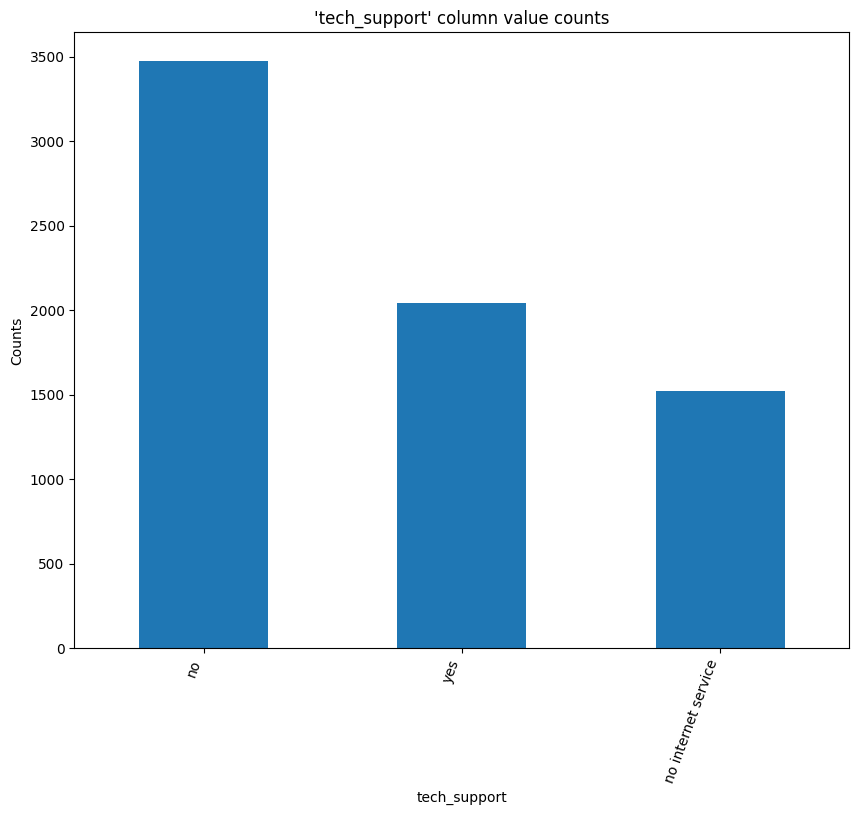

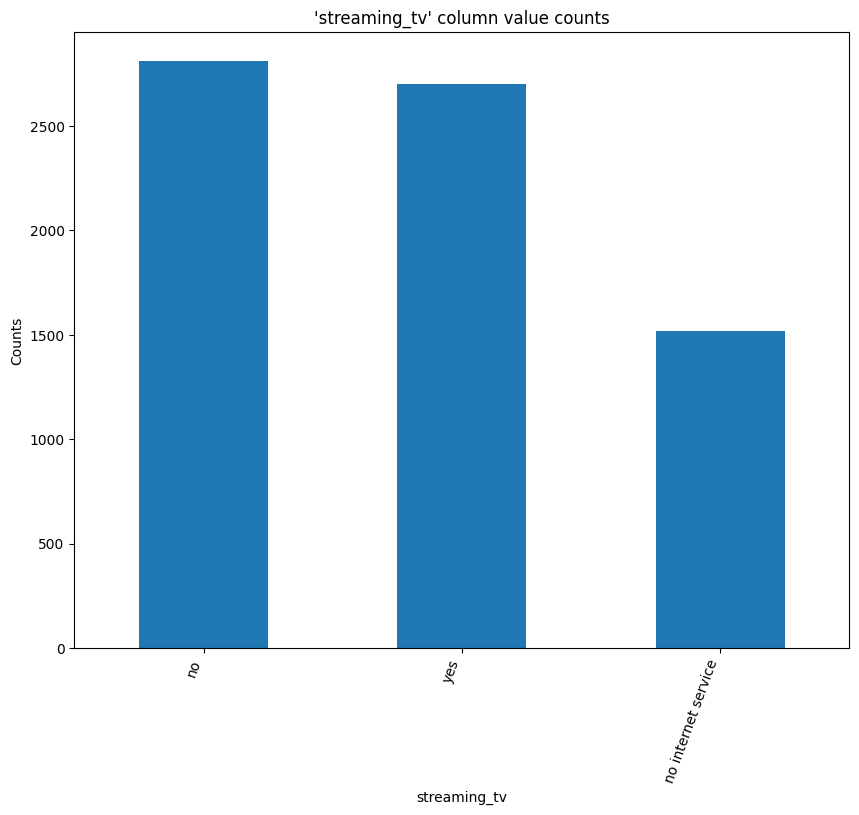

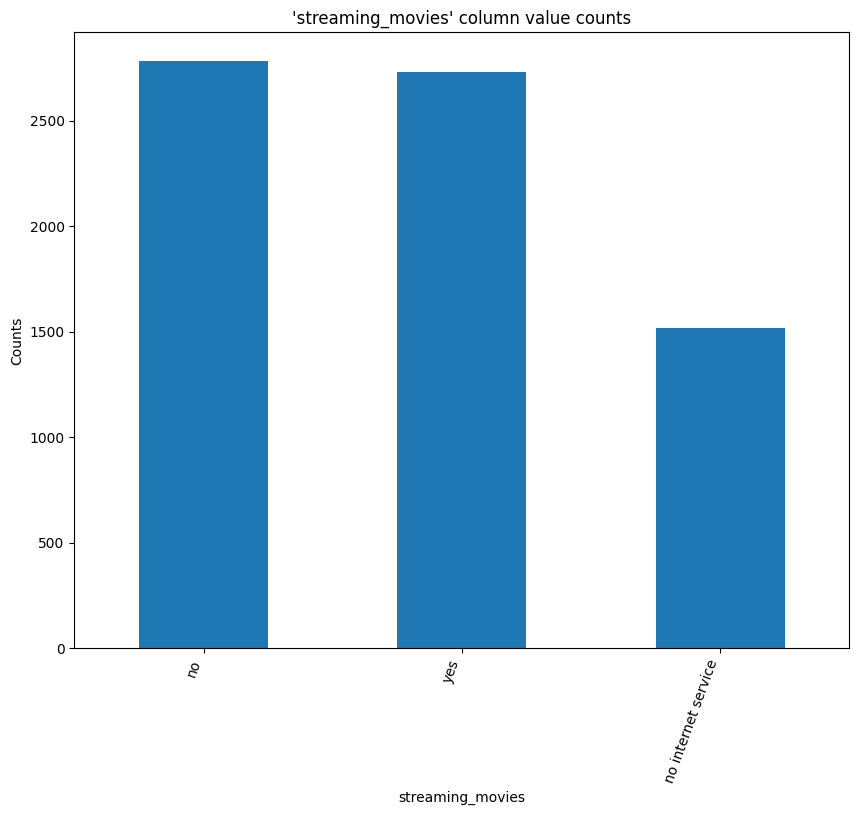

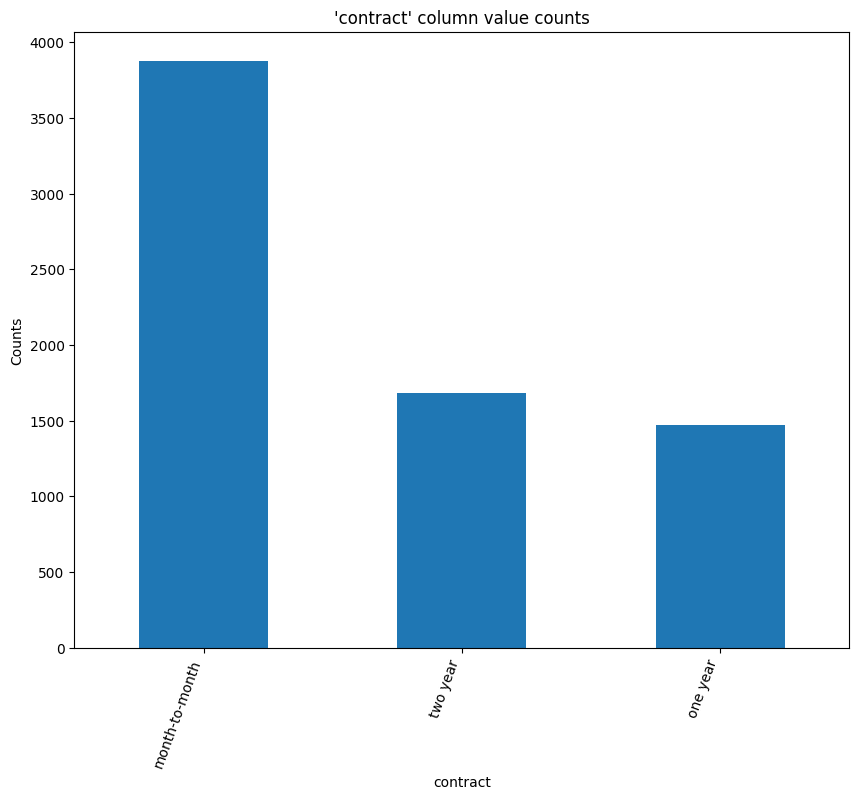

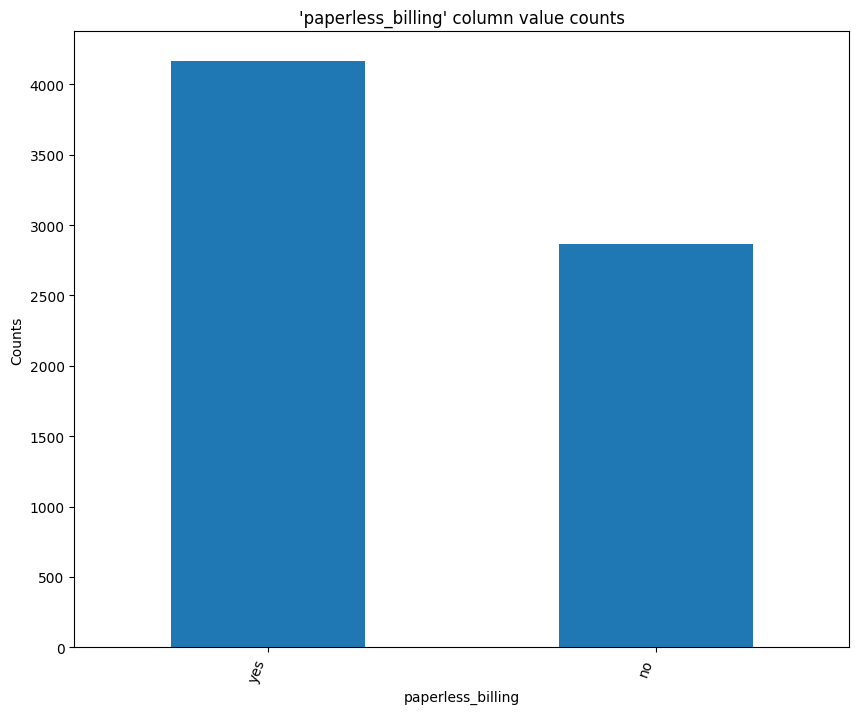

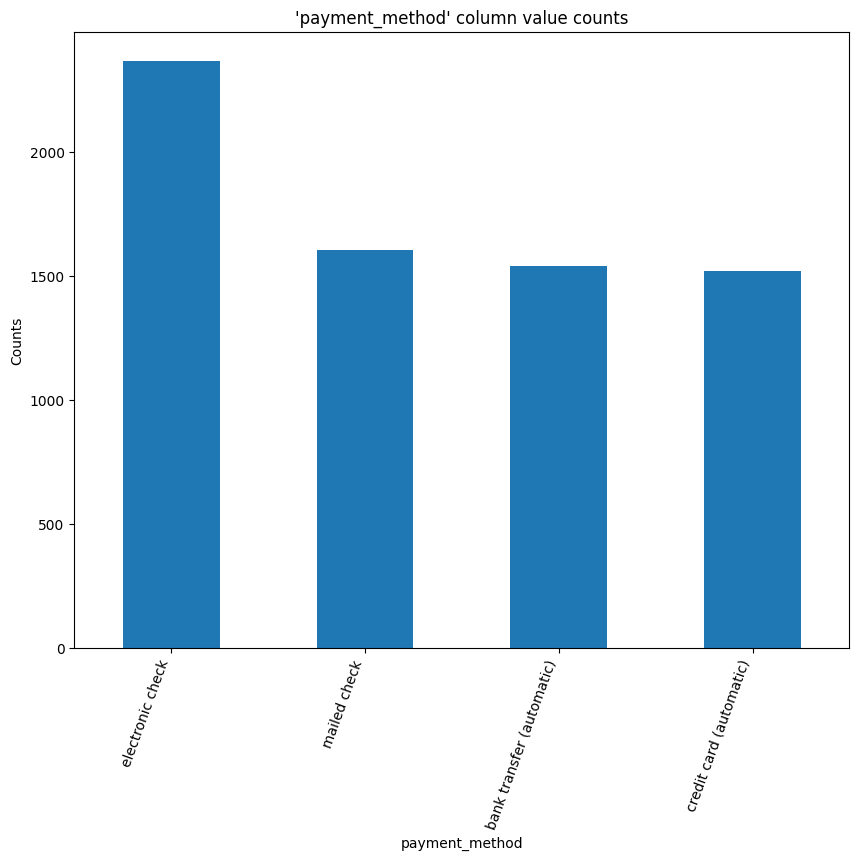

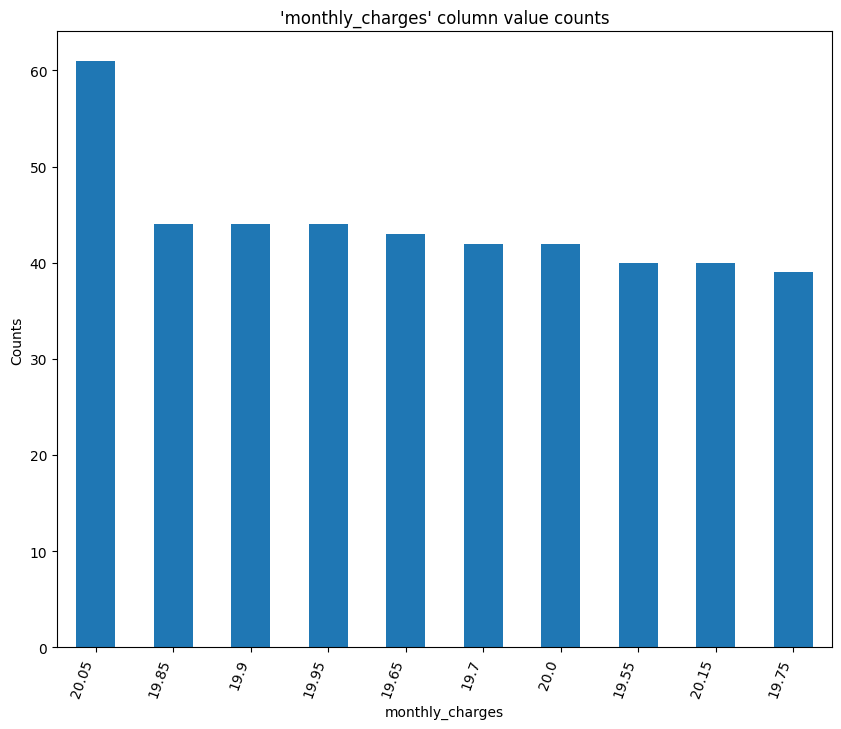

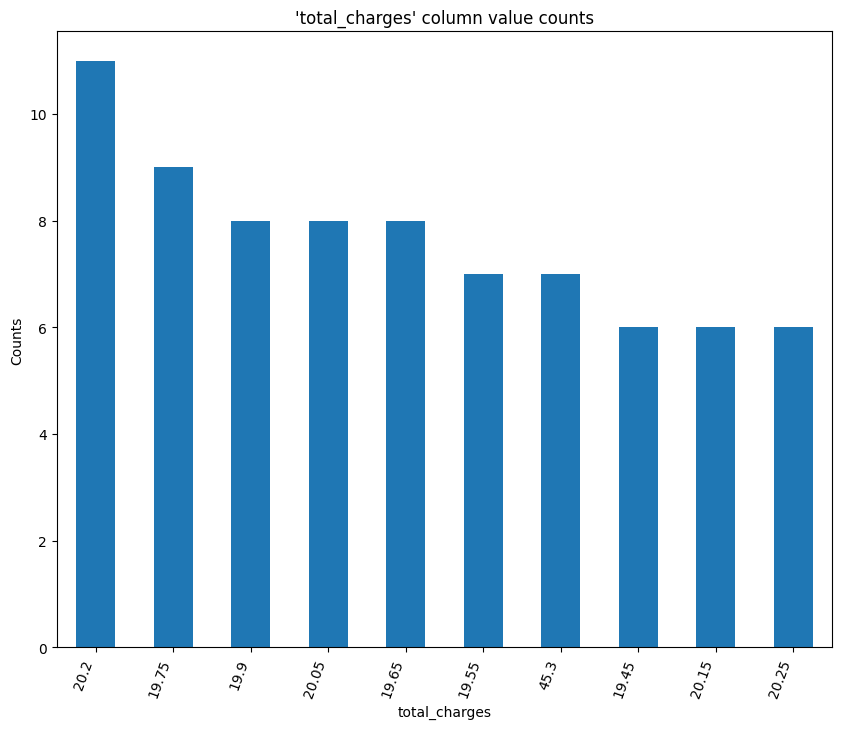

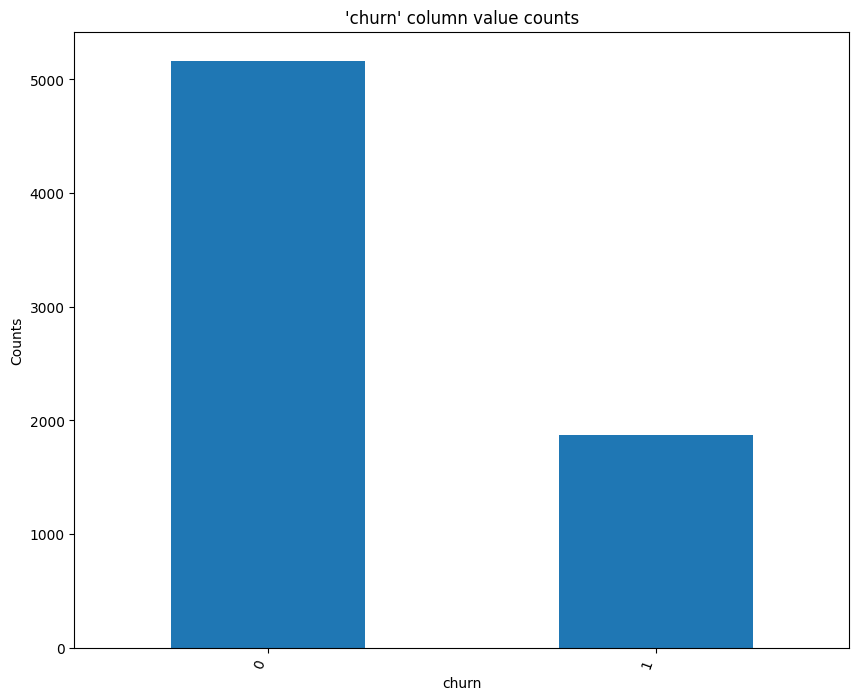

In [13]:
# Exploratory Data Analysis
def eda_plot(column, topn=10):
    plt.figure(figsize=(10, 8))
    df[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 70, ha='right')
    plt.show()

columns = df.columns

for column in columns:
    eda_plot(column)

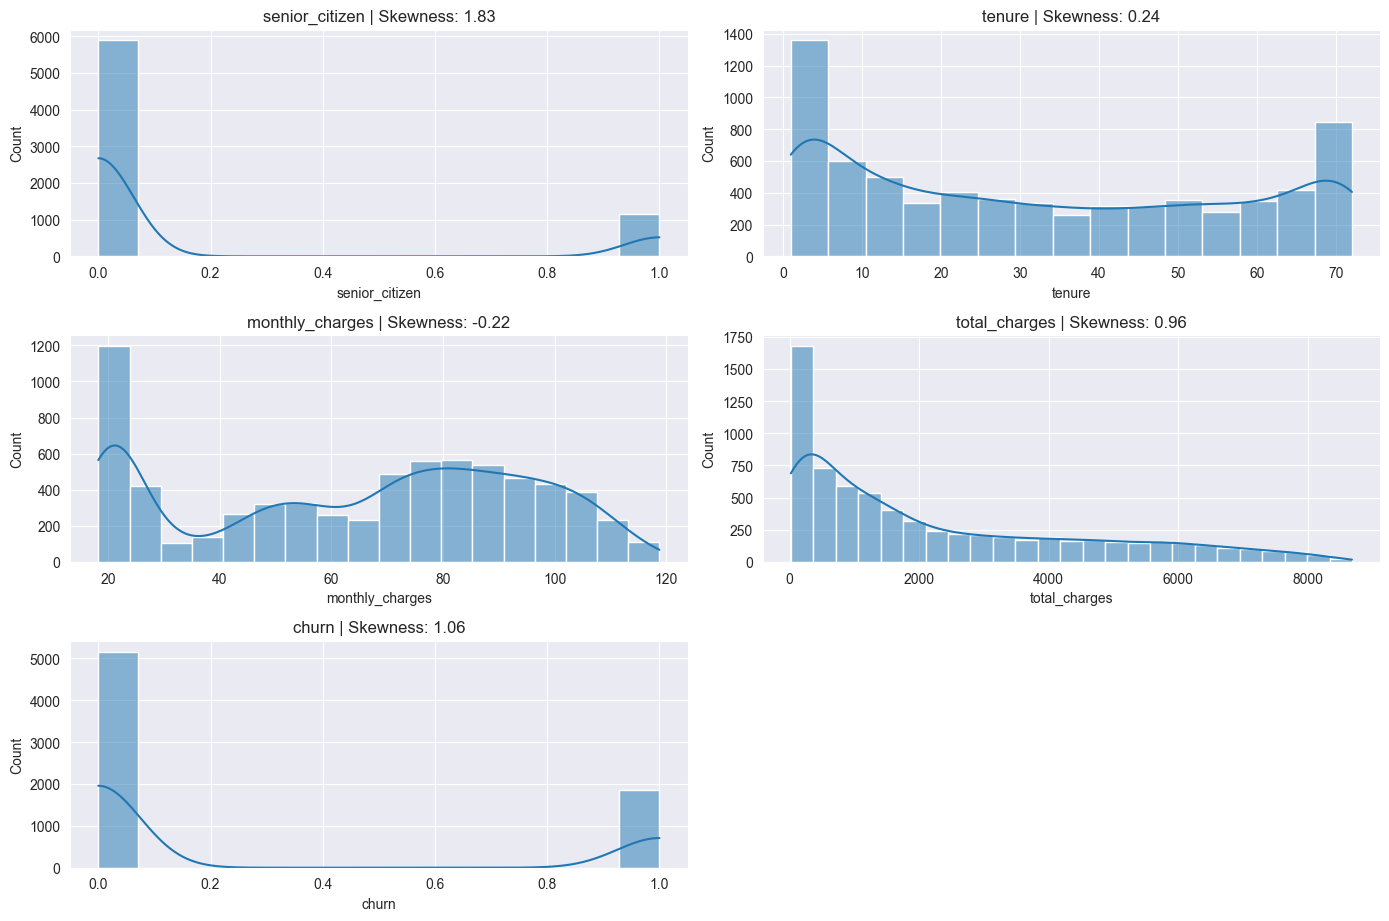

In [14]:
# Kernel Density Plot for understanding variance in the dataset
sns.set_style("darkgrid")
numerical_columns = df.select_dtypes(include=["int", "float"]).columns 
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

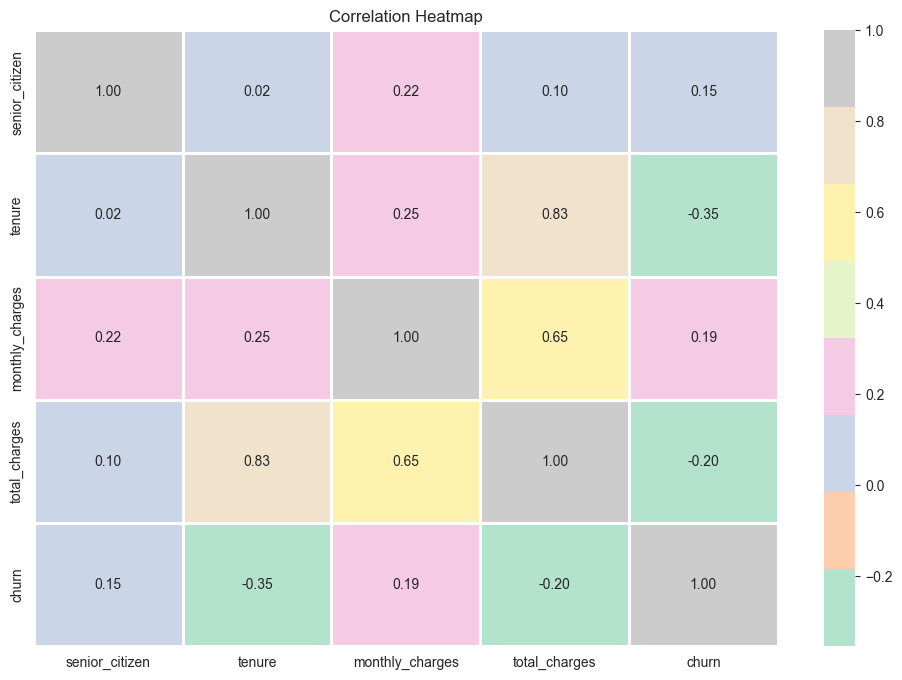

In [15]:
# Correlation Matrix for examining the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, 
            fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show() 

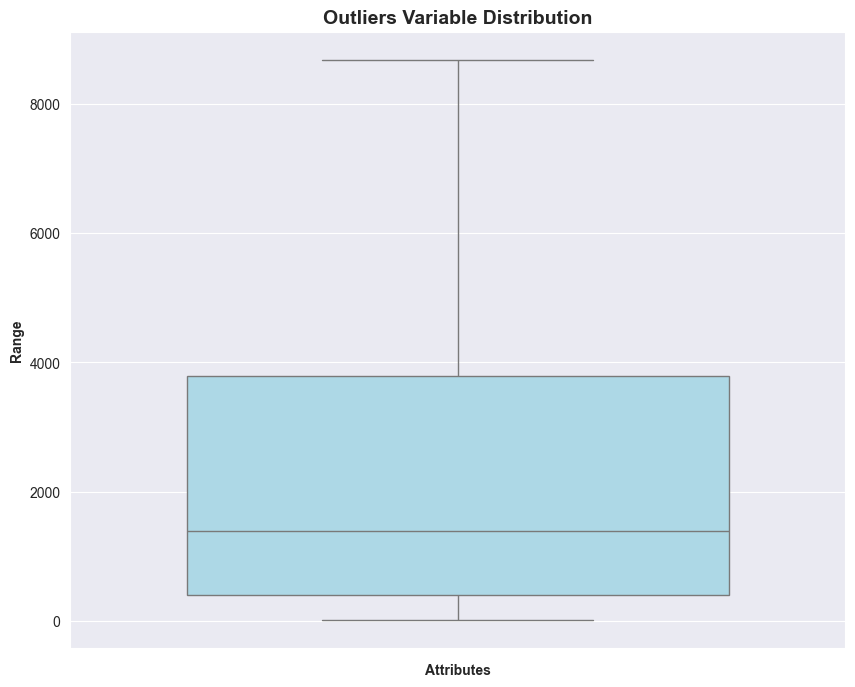

In [18]:
# Outliers
# Visualize Outlier Analysis of many columns at once
#attributes = ['monthly_charges','total_charges']

plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df['total_charges'], orient="v",  color="lightblue",
whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

churn
0    5163
1    1869
Name: count, dtype: int64


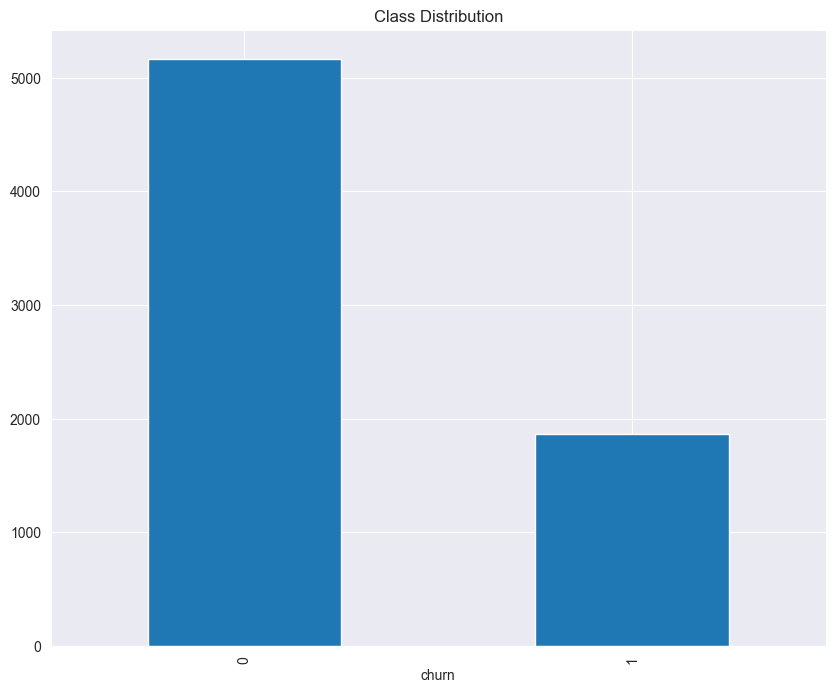

In [19]:
# Imbalance
# Visualize imbalance
print(df['churn'].value_counts())
df['churn'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [20]:
# Label Encoding
# Check for categorical columns
df.select_dtypes(include=['object', 'category']).head(3) 

gender partner dependents phone_service    multiple_lines internet_service online_security online_backup device_protection tech_support streaming_tv streaming_movies        contract paperless_billing    payment_method
0  female     yes         no            no  no phone service              dsl              no           yes                no           no           no               no  month-to-month               yes  electronic check
1    male      no         no           yes                no              dsl             yes            no               yes           no           no               no        one year                no      mailed check
2    male      no         no           yes                no              dsl             yes           yes                no           no           no               no  month-to-month               yes      mailed check

In [21]:
# Option 1: Use a loop for multiple columns
categorical_cols = df.select_dtypes(include=['object', 'category'])
label_encoders = {} 

for col in categorical_cols: 
    le = LabelEncoder() 
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for potential inverse transform

In [23]:
# Drop categorical columns
df.drop(df.select_dtypes(include=['object', 'category']), axis=1, inplace=True) 

## Machine Learning to imbalance dataset

In [26]:
# Regression Models
%matplotlib inline
#%matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from collections import Counter
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor,
RandomForestRegressor, VotingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report,
f1_score, silhouette_score, adjusted_rand_score) 

## LinearRegression

Dataset shape: (7032, 19)
Feature names: Index(['senior_citizen', 'tenure', 'monthly_charges', 'churn', 'gender_encoded', 'partner_encoded', 'dependents_encoded', 'phone_service_encoded', 'multiple_lines_encoded', 'internet_service_encoded', 'online_security_encoded', 'online_backup_encoded', 'device_protection_encoded', 'tech_support_encoded', 'streaming_tv_encoded', 'streaming_movies_encoded', 'contract_encoded', 'paperless_billing_encoded', 'payment_method_encoded'], dtype='object')

X Train shape: (5625, 19)
Y Train shape: (5625,)
X Test shape: (1407, 19)
Y Test shape: (1407,)
-------------------------------------------------------------------------------------------------------------------------------
=== Linear Regression Tuning Examples ===
=== Feature Correlation Analysis ===


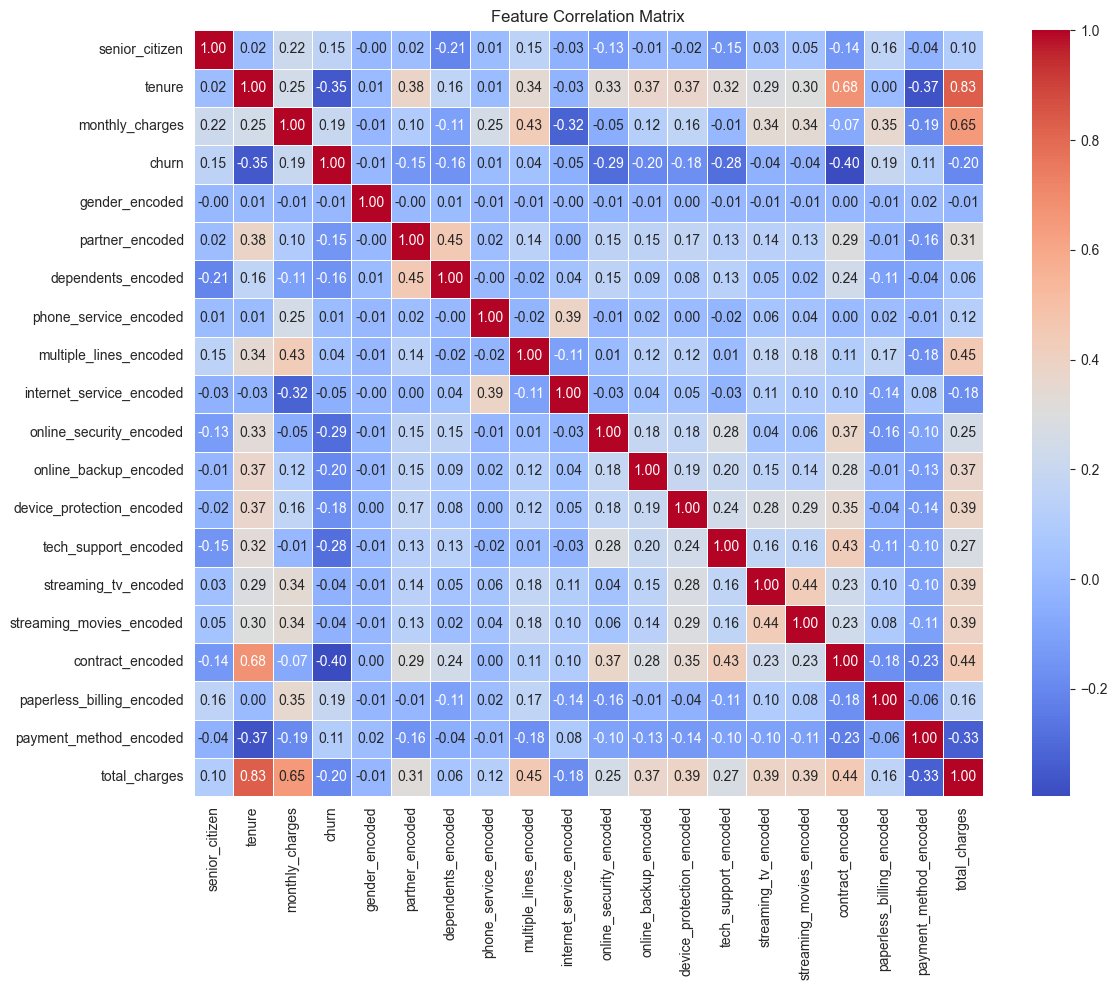

Feature correlation with target (total_charges):
total_charges                1.000000
tenure                       0.826658
monthly_charges              0.647921
multiple_lines_encoded       0.452653
contract_encoded             0.443836
streaming_movies_encoded     0.393763
device_protection_encoded    0.386497
streaming_tv_encoded         0.386125
online_backup_encoded        0.368798
partner_encoded              0.313197
tech_support_encoded         0.270943
online_security_encoded      0.248297
paperless_billing_encoded    0.158001
phone_service_encoded        0.116929
senior_citizen               0.104740
dependents_encoded           0.056748
gender_encoded              -0.011223
internet_service_encoded    -0.180046
churn                       -0.195073
payment_method_encoded      -0.334016
Name: total_charges, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
=== Cross-Validation ===
Cr

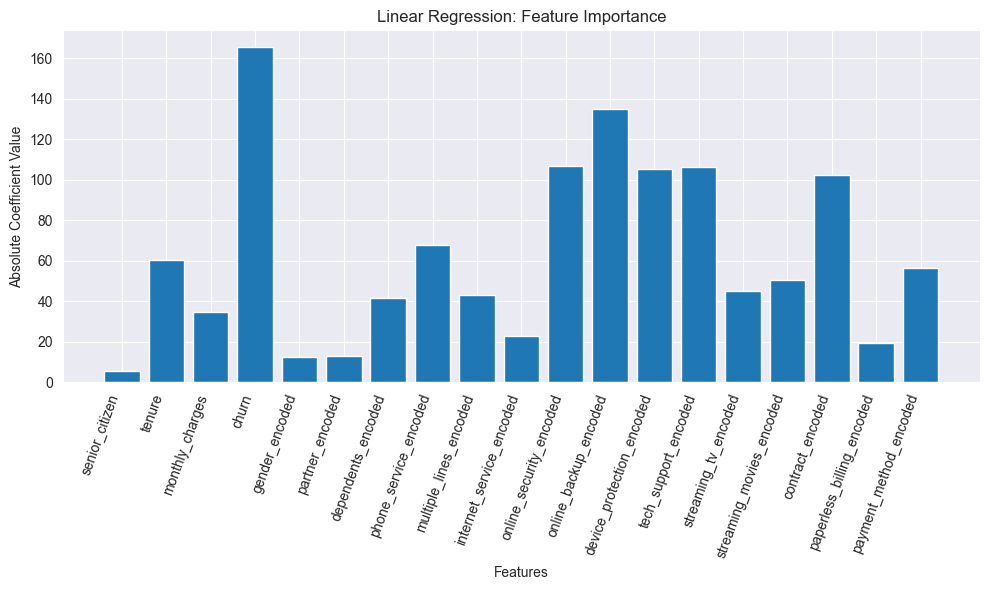

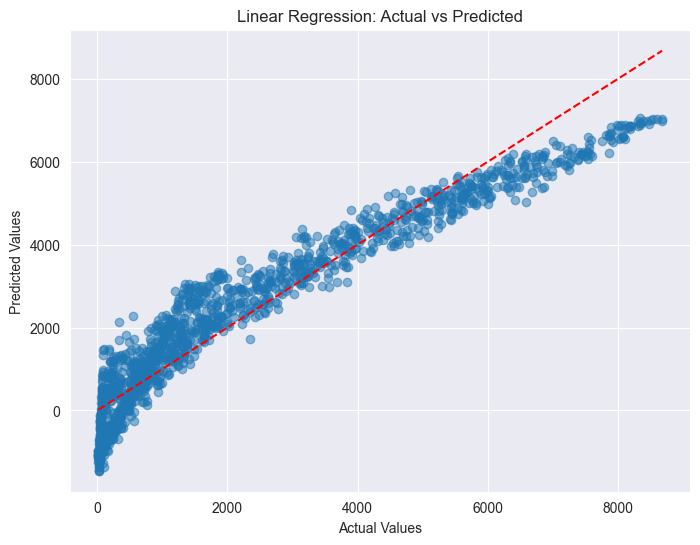

=== Scaled Linear Regression ===
MSE test set: 495690.5178
MSE train set: 475839.3422

R² Score test: 0.9098
R² Score train: 0.9057

MAE test set: 573.2799
MAE train set: 554.5649

Selected Features Coef_: ['senior_citizen' 'tenure' 'monthly_charges' 'churn' 'gender_encoded'
 'partner_encoded' 'dependents_encoded' 'phone_service_encoded'
 'multiple_lines_encoded' 'internet_service_encoded'
 'online_security_encoded' 'online_backup_encoded'
 'device_protection_encoded' 'tech_support_encoded' 'streaming_tv_encoded'
 'streaming_movies_encoded' 'contract_encoded' 'paperless_billing_encoded'
 'payment_method_encoded']
-------------------------------------------------------------------------------------------------------------------------------


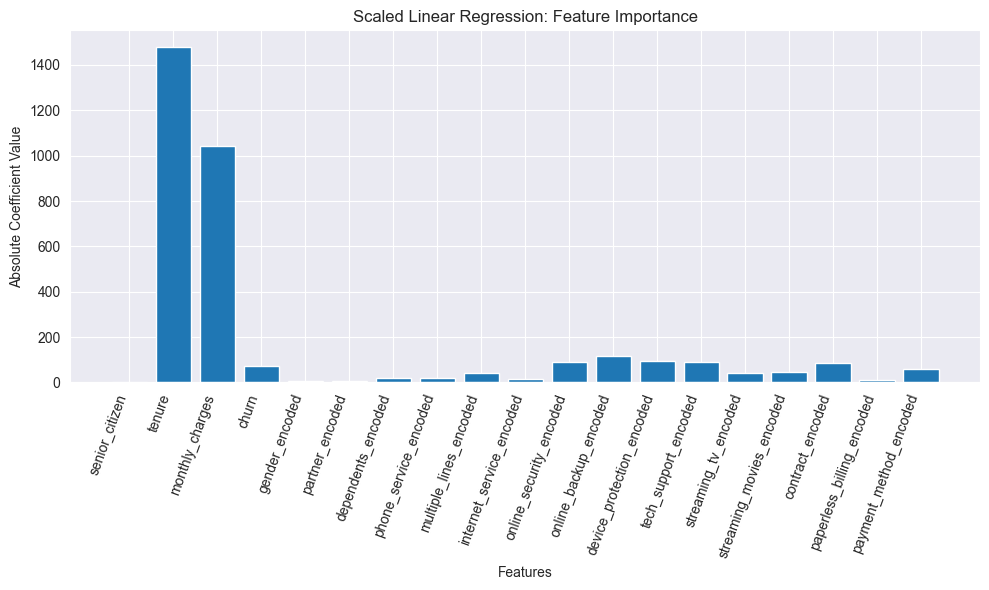

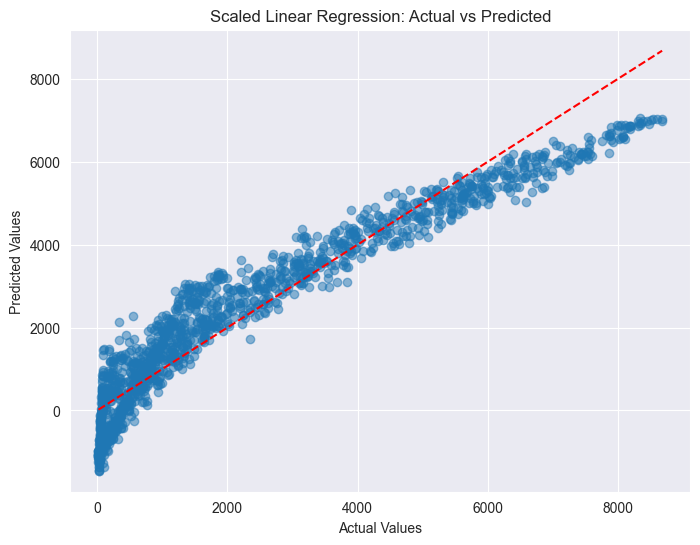

=== Feature Selection (SelectKBest) ===
MSE test set: 548004.7210
MSE train set: 531312.3439

R² Score test: 0.9003
R² Score train: 0.8947

MAE test set: 593.8201
MAE train set: 578.6551

Selected Features Selector : ['tenure' 'monthly_charges' 'multiple_lines_encoded'
 'streaming_movies_encoded' 'contract_encoded']
-------------------------------------------------------------------------------------------------------------------------------


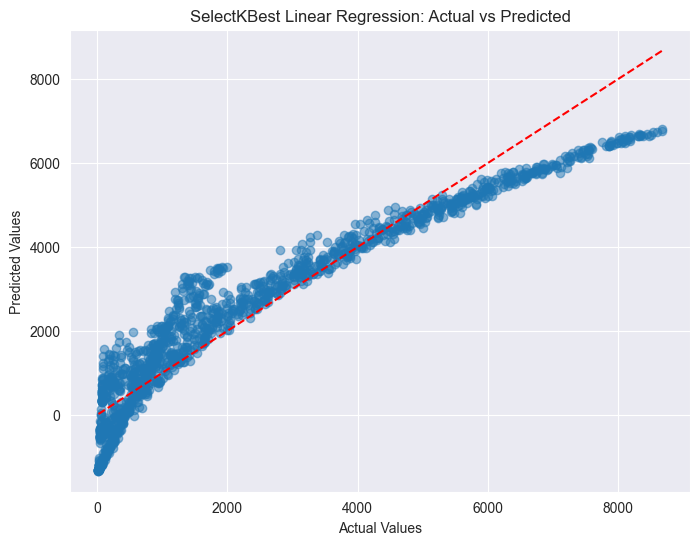

=== Feature Selection (RFE) ===
MSE test set: 514041.0837
MSE train set: 497321.0280

R² Score test: 0.9065
R² Score train: 0.9014

MAE test set: 582.7092
MAE train set: 566.5733

Selected Features Selector : ['tenure' 'monthly_charges' 'online_backup_encoded'
 'device_protection_encoded' 'tech_support_encoded']
-------------------------------------------------------------------------------------------------------------------------------


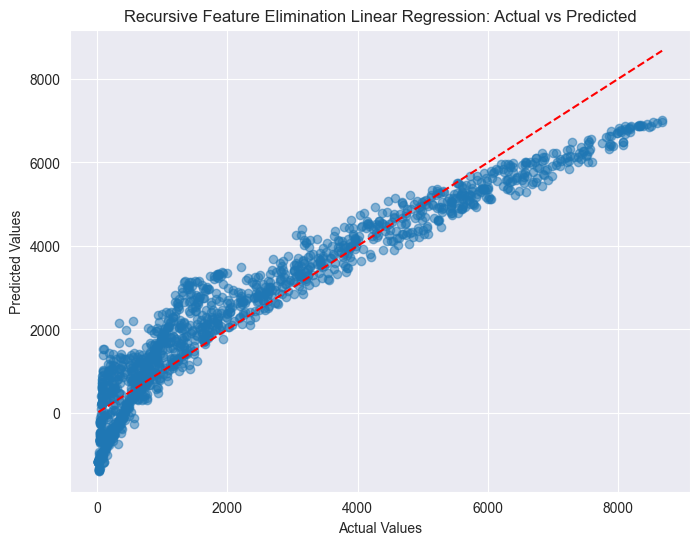

=== Polynomial Regression ===
MSE test set: 4538.7296
MSE train set: 4406.9255

R² Score test: 0.9992
R² Score train: 0.9991

MAE test set: 46.6447
MAE train set: 45.2034

Selected Features Coef_: ['senior_citizen' 'tenure' 'monthly_charges' 'churn' 'gender_encoded'
 'partner_encoded' 'dependents_encoded' 'phone_service_encoded'
 'multiple_lines_encoded' 'internet_service_encoded'
 'online_security_encoded' 'online_backup_encoded'
 'device_protection_encoded' 'tech_support_encoded' 'streaming_tv_encoded'
 'streaming_movies_encoded' 'contract_encoded' 'paperless_billing_encoded'
 'payment_method_encoded' 'senior_citizen^2' 'senior_citizen tenure'
 'senior_citizen monthly_charges' 'senior_citizen churn'
 'senior_citizen gender_encoded' 'senior_citizen partner_encoded'
 'senior_citizen dependents_encoded'
 'senior_citizen phone_service_encoded'
 'senior_citizen multiple_lines_encoded'
 'senior_citizen internet_service_encoded'
 'senior_citizen online_security_encoded'
 'senior_citizen onl

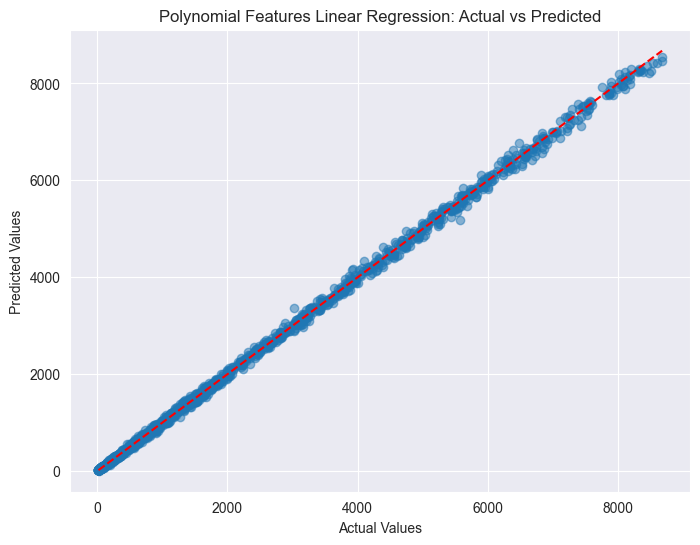

=== Ridge Regression ===
MSE test set:  495724.6734
MSE train set: 475839.5876

R² Score test: 0.9098
R² Score train:0.9057

MAE test set:  573.3033
MAE train set: 554.5660

Best alpha:    1.0000

Selected Features Coef_: ['senior_citizen' 'tenure' 'monthly_charges' 'churn' 'gender_encoded'
 'partner_encoded' 'dependents_encoded' 'phone_service_encoded'
 'multiple_lines_encoded' 'internet_service_encoded'
 'online_security_encoded' 'online_backup_encoded'
 'device_protection_encoded' 'tech_support_encoded' 'streaming_tv_encoded'
 'streaming_movies_encoded' 'contract_encoded' 'paperless_billing_encoded'
 'payment_method_encoded']
-------------------------------------------------------------------------------------------------------------------------------


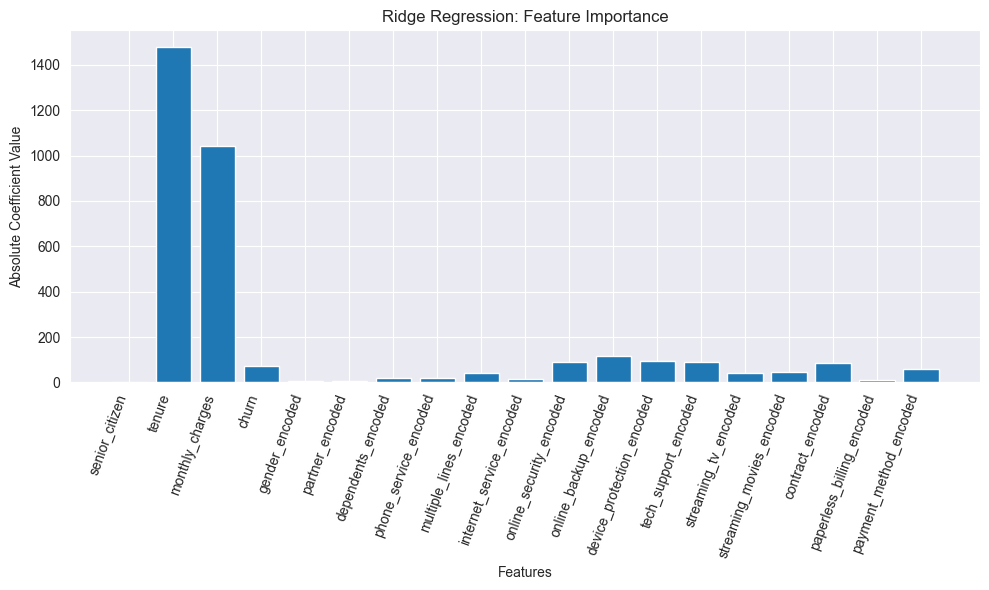

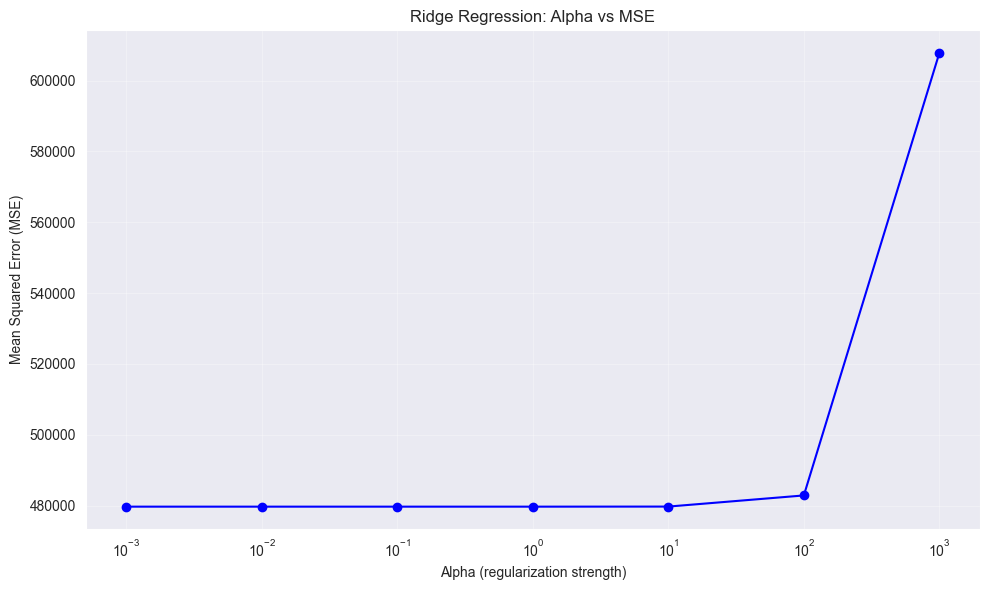

=== Lasso Regression ===
MSE test set: 495712.7932
MSE train set: 475862.6509

R² Score test: 0.9098
R² Score train: 0.9057

MAE test set: 573.1682
MAE train set: 554.4299

Best alpha: 1.0

Selected features: ['senior_citizen' 'tenure' 'monthly_charges' 'churn' 'gender_encoded'
 'partner_encoded' 'dependents_encoded' 'phone_service_encoded'
 'multiple_lines_encoded' 'internet_service_encoded'
 'online_security_encoded' 'online_backup_encoded'
 'device_protection_encoded' 'tech_support_encoded' 'streaming_tv_encoded'
 'streaming_movies_encoded' 'contract_encoded' 'paperless_billing_encoded'
 'payment_method_encoded']
-------------------------------------------------------------------------------------------------------------------------------


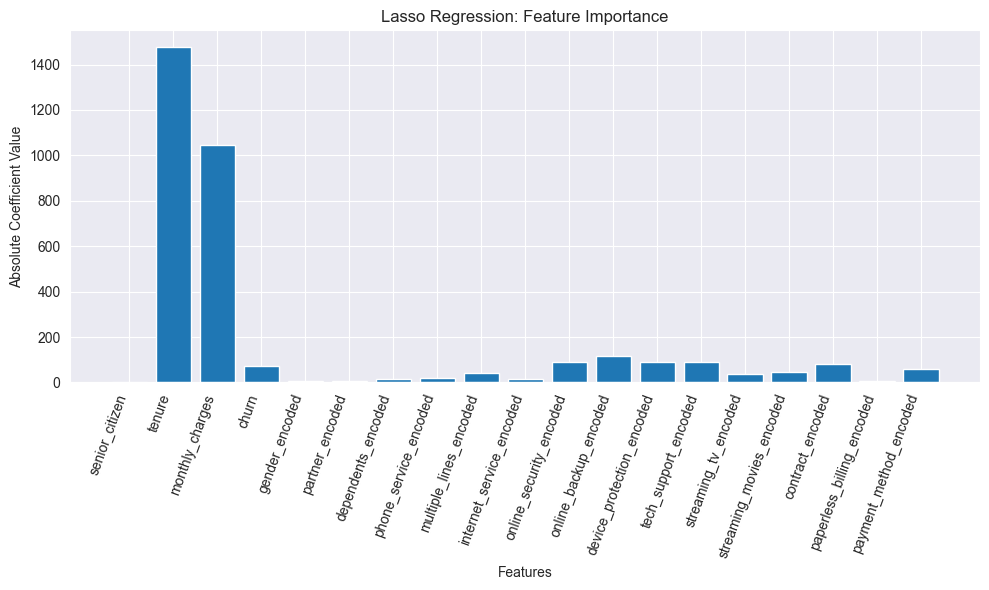

=== Elastic Net Regression ===
MSE test set: 495887.0259
MSE train set: 475848.0647

R² Score test: 0.9098
R² Score train: 0.9057

MAE test set: 573.4075
MAE train set: 554.5652

Best parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.99}

Selected Features Coef_: ['senior_citizen' 'tenure' 'monthly_charges' 'churn' 'gender_encoded'
 'partner_encoded' 'dependents_encoded' 'phone_service_encoded'
 'multiple_lines_encoded' 'internet_service_encoded'
 'online_security_encoded' 'online_backup_encoded'
 'device_protection_encoded' 'tech_support_encoded' 'streaming_tv_encoded'
 'streaming_movies_encoded' 'contract_encoded' 'paperless_billing_encoded'
 'payment_method_encoded']
-------------------------------------------------------------------------------------------------------------------------------


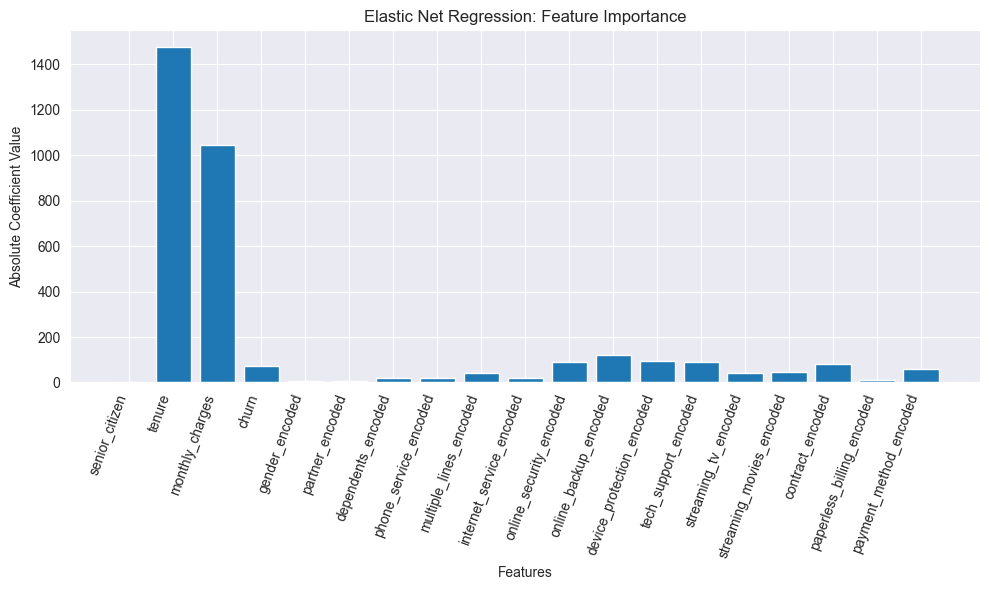

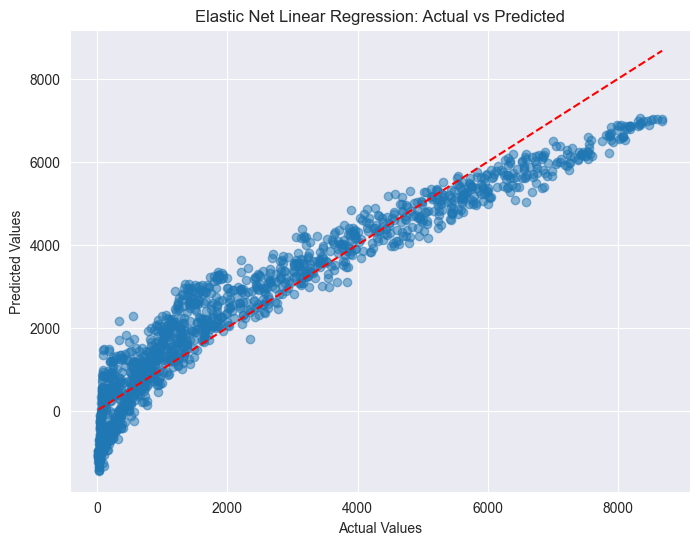

-------------------------------------------------------------------------------------------------------------------------------
=== Model Comparison ===
                                     MAE       MSE          R²
Polynomial Regression        4538.729598  0.999174   46.644747
Basic Linear Regression    495690.517824  0.909806  573.279883
Scaled Linear Regression   495690.517824  0.909806  573.279883
Lasso Regression           495712.793246  0.909802  573.168249
Ridge Regression           495724.673360  0.909800  573.303319
Elastic Net                495887.025937  0.909771  573.407522
Feature Selection (RFE)    514041.083679  0.906467  582.709243
Feature Selection (KBest)  548004.720993  0.900288  593.820143
-------------------------------------------------------------------------------------------------------------------------------
Best model according to MAE: Polynomial Regression
Best model according to MSE: Polynomial Regression
Best model according to RMSE: Polynomial Regressio

In [38]:
# Training & Splitting
X = df.drop(columns=['total_charges'], axis=1)
y = df['total_charges']

print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print() 

# For short dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Basic Linear Regression model
def basic_linear_regression():
    print("=== Basic Linear Regression ===")
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n") 
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    
    # Check which features were selected (non-zero coefficients)
    lr_coef = model.coef_
    selected_features = np.array(X_train.columns)[lr_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.show()

    return model, mse_test, r2_test, mae_test

# Feature Scaling
def scaled_linear_regression():
    print("=== Scaled Linear Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    # Check which features were selected (non-zero coefficients)
    scaled_lr_coef = pipeline.named_steps['regression'].coef_
    selected_features = np.array(X_train.columns)[scaled_lr_coef != 0]
    print(f"Selected Features Coef_: {selected_features}") 
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(scaled_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Scaled Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scaled Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with SelectKBest
def feature_selection_kbest():
    print("=== Feature Selection (SelectKBest) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(f_regression, k=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}")
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('SelectKBest Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with Recursive Feature Elimination (RFE)
def feature_selection_rfe():
    print("=== Feature Selection (RFE) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', RFE(LinearRegression(), n_features_to_select=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}") 
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Recursive Feature Elimination Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Polynomial Features
def polynomial_regression():
    print("=== Polynomial Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}") 

    # Get the polynomial feature names
    poly_features = pipeline.named_steps['poly'].get_feature_names_out(X_train.columns)
    
    # Get coefficients from the regression step
    poly_coef = pipeline.named_steps['regression'].coef_
    
    # Find selected features (non-zero coefficients)
    selected_features = poly_features[poly_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Polynomial Features Linear Regression: Actual vs Predicted')
    plt.show()  
    
    return pipeline, mse_test, r2_test, mae_test

# Regularized Linear Regression - Ridge
def ridge_regression():
    print("=== Ridge Regression ===")
    param_grid = {'ridge__alpha': np.logspace(-3, 3, 7)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(random_state=42))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set:  {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train:{r2_train:.4f}\n")
    print(f"MAE test set:  {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    print(f"Best alpha:    {grid_search.best_params_['ridge__alpha']:.4f}")
  
    # Check which features were selected (non-zero coefficients)
    ridge_lr_coef = grid_search.best_estimator_['ridge'].coef_
    selected_features = np.array(X_train.columns)[ridge_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(ridge_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Ridge Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize alpha vs MSE
    plt.figure(figsize=(10, 6))
    results = pd.DataFrame(grid_search.cv_results_)
    alphas = np.array(param_grid['ridge__alpha'])
    scores = -results['mean_test_score']
    plt.semilogx(alphas, scores, 'b-o')
    plt.xlabel('Alpha (regularization strength)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Ridge Regression: Alpha vs MSE')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return best_model, mse_test, r2_test, mae_test

# Regularized Linear Regression - Lasso
def lasso_regression():
    print("=== Lasso Regression ===")
    param_grid = {'lasso__alpha': np.logspace(-3, 1, 5)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")   
    print(f"Best alpha: {grid_search.best_params_['lasso__alpha']}") 
    
    # Check which features were selected (non-zero coefficients)
    lasso_coef = best_model.named_steps['lasso'].coef_
    selected_features = np.array(X_train.columns)[lasso_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lasso_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Lasso Regression: Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return best_model, mse_test, r2_test, mae_test

# Elastic Net
def elastic_net_regression():
    print("=== Elastic Net Regression ===")
    param_grid = {
        'elasticnet__alpha': np.logspace(-3, 1, 5),
        'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
    }
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('elasticnet', ElasticNet(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")    
    print(f"Best parameters: {grid_search.best_params_}")

    # Check which features were selected (non-zero coefficients)
    elastic_lr_coef = grid_search.best_estimator_['elasticnet'].coef_
    selected_features = np.array(X_train.columns)[elastic_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(elastic_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Elastic Net Regression: Feature Importance')
    plt.tight_layout()
    plt.show()  
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Elastic Net Linear Regression: Actual vs Predicted')
    plt.show() 
    print("-" * 127) 
    
    return best_model, mse_test, r2_test, mae_test

# Cross-validation with MAE, MSE, and R² scores
def cross_validation_example():
    print("-" * 127)
    print("=== Cross-Validation ===")
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate different metrics
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    rmse_scores = np.sqrt(mse_scores)
    
    print(f"Cross-Validation MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")
    print(f"Cross-Validation MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
    print(f"Cross-Validation R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
    print("-" * 127) 
    
    return mse_scores, mae_scores, r2_scores, rmse_scores
        
# Compare all models
def compare_models():
    models = {
        'Basic Linear Regression': basic_linear_regression(),
        'Scaled Linear Regression': scaled_linear_regression(),
        'Feature Selection (KBest)': feature_selection_kbest(),
        'Feature Selection (RFE)': feature_selection_rfe(),
        'Polynomial Regression': polynomial_regression(),
        'Ridge Regression': ridge_regression(),
        'Lasso Regression': lasso_regression(),
        'Elastic Net': elastic_net_regression()
    }

    # Extract MSE and R² scores
    results = {name: {'MAE': mae_scores, 'MSE': mse_scores, 'R²': r2_scores} 
           for name, (_, mae_scores, mse_scores, r2_scores) in models.items()} 

    results_df = pd.DataFrame(results).T
    
    # Sort by MSE (lower is better)
    results_df = results_df.sort_values('MSE', ascending=False)
    
    print("=== Model Comparison ===")
    print(results_df)
    print("-" * 127) 
    
    return results_df 

    # Plot comparison
    plt.figure(figsize=(12, 15))  # Increase height for 3 subplots

    plt.subplot(3, 1, 1)  # This now works with 3 rows
    plt.bar(results_df.index, results_df['MAE'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Model Comparison - MAE (lower is better)')
    
    plt.subplot(3, 1, 2)  # Change to 3 rows
    plt.bar(results_df.index, results_df['MSE'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Model Comparison - MSE (lower is better)')
    
    plt.subplot(3, 1, 3)  # Change to 3 rows
    plt.bar(results_df.index, results_df['R²'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('R² Score (higher is better)')
    plt.title('Model Comparison - R² (higher is better)')

    plt.tight_layout()
    plt.show()
    
# Feature Correlation Analysis
def feature_correlation_analysis():
    print("=== Feature Correlation Analysis ===")
    X_df = pd.DataFrame(df, columns=X_train.columns)  # Always change the df value based on the df's name you're using
    X_df['total_charges'] = y_train  # Always change the X_df value 
    
    corr = X_df.corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Sort features by correlation with target
    target_corr = corr['total_charges'].sort_values(ascending=False) # Always change the target_coor value 
    print("Feature correlation with target (total_charges):")  # Always change the variable value 
    print(target_corr)
    
    return corr

# Main execution
if __name__ == "__main__":
    print("=== Linear Regression Tuning Examples ===")
    feature_correlation_analysis()
    cross_validation_example()
    results = compare_models()
    
    print(f"Best model according to MAE: {results.index[0]}")
    print(f"Best model according to MSE: {results.index[0]}")
    print(f"Best model according to RMSE: {results.index[0]}")
    print(f"Best model according to R2_score: {results.index[0]}")
    print("-" * 127) 

## LogisticRegression

Dataset shape: (7032, 19)
Feature names: Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'gender_encoded', 'partner_encoded', 'dependents_encoded', 'phone_service_encoded', 'multiple_lines_encoded', 'internet_service_encoded', 'online_security_encoded', 'online_backup_encoded', 'device_protection_encoded', 'tech_support_encoded', 'streaming_tv_encoded', 'streaming_movies_encoded', 'contract_encoded', 'paperless_billing_encoded', 'payment_method_encoded'], dtype='object')
Number of classes: 2
Class distribution: [5163 1869]

X Train shape: (5625, 19)
Y Train shape: (5625,)
X Test shape: (1407, 19)
Y Test shape: (1407,)
-------------------------------------------------------------------------------------------------------------------------------

--- Basic Model Performance ---
Accuracy test set: 0.8202
Accuracy train set: 0.7995

Classification Report:
Classification Report test set:
               precision    recall  f1-score   support

           0       0.86  

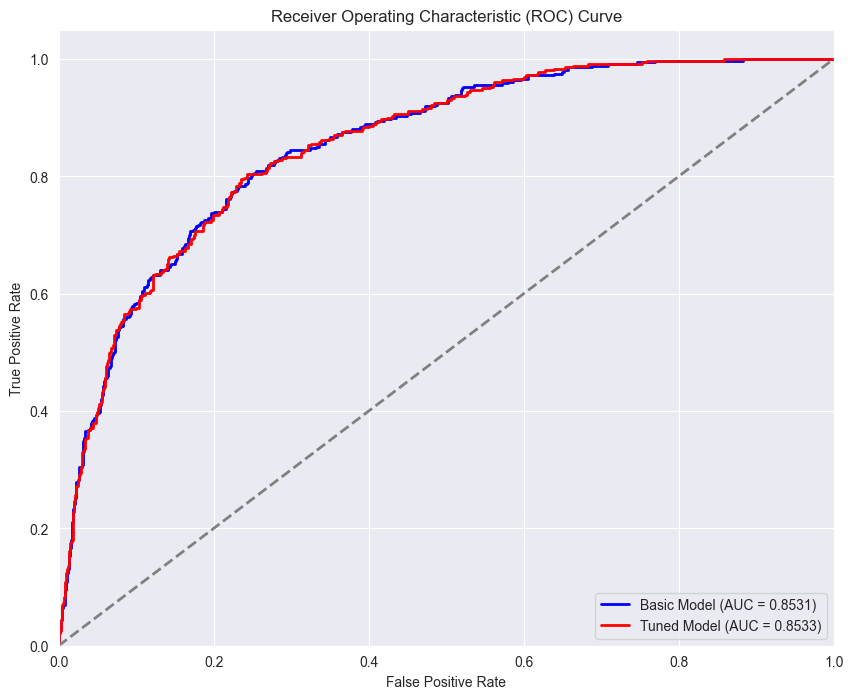

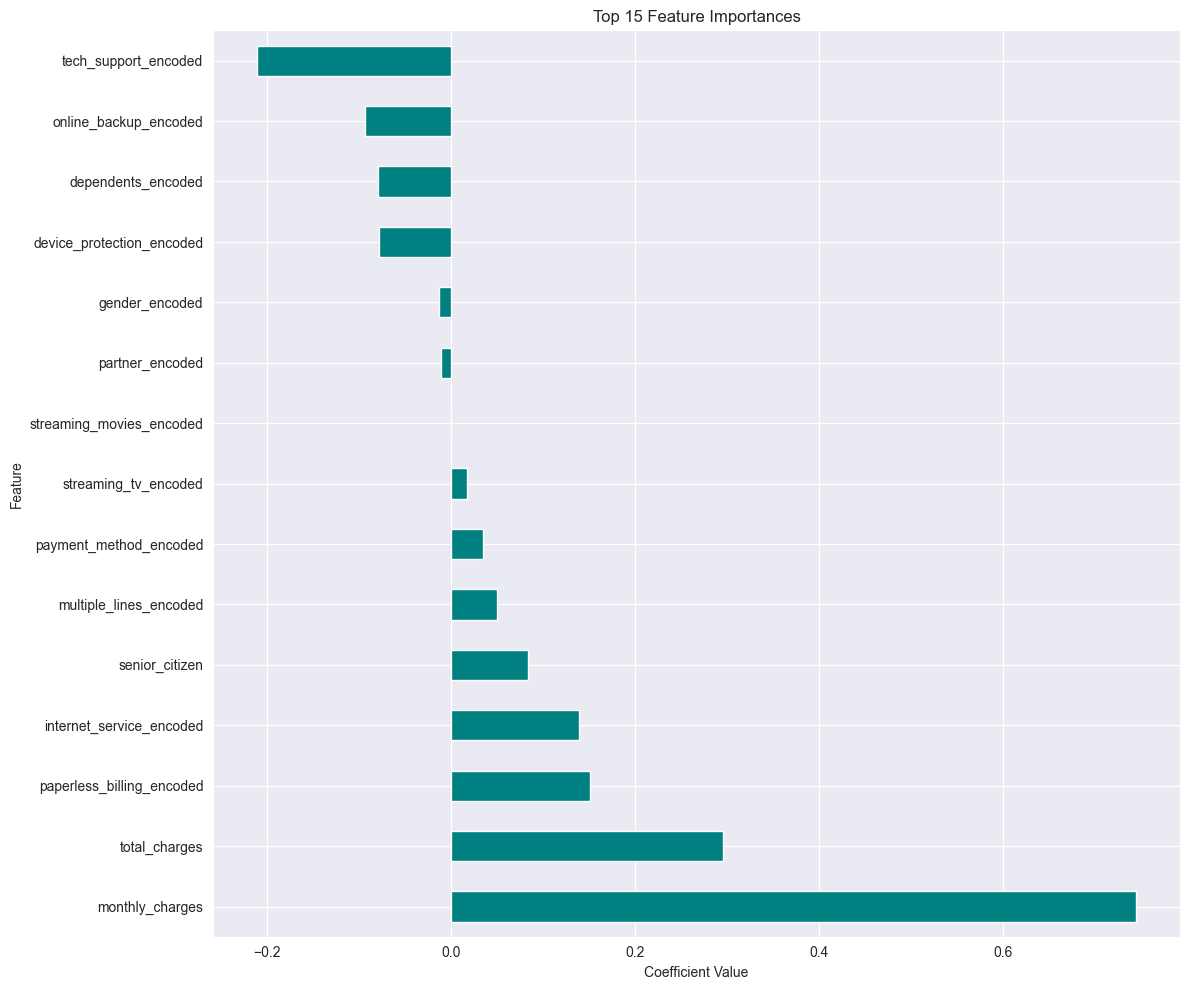

--- Top 10 Most Important Features ---
                           Coefficient
monthly_charges               0.744859
total_charges                 0.296437
paperless_billing_encoded     0.151100
internet_service_encoded      0.139195
senior_citizen                0.084025
multiple_lines_encoded        0.050173
payment_method_encoded        0.035227
streaming_tv_encoded          0.018152
streaming_movies_encoded      0.000000
partner_encoded              -0.010955
--- Bottom 10 Least Important Features ---
                           Coefficient
partner_encoded              -0.010955
gender_encoded               -0.012730
device_protection_encoded    -0.078000
dependents_encoded           -0.079065
online_backup_encoded        -0.092675
tech_support_encoded         -0.210446
online_security_encoded      -0.213345
phone_service_encoded        -0.263191
contract_encoded             -0.556833
tenure                       -1.075374
------------------------------------------------------------

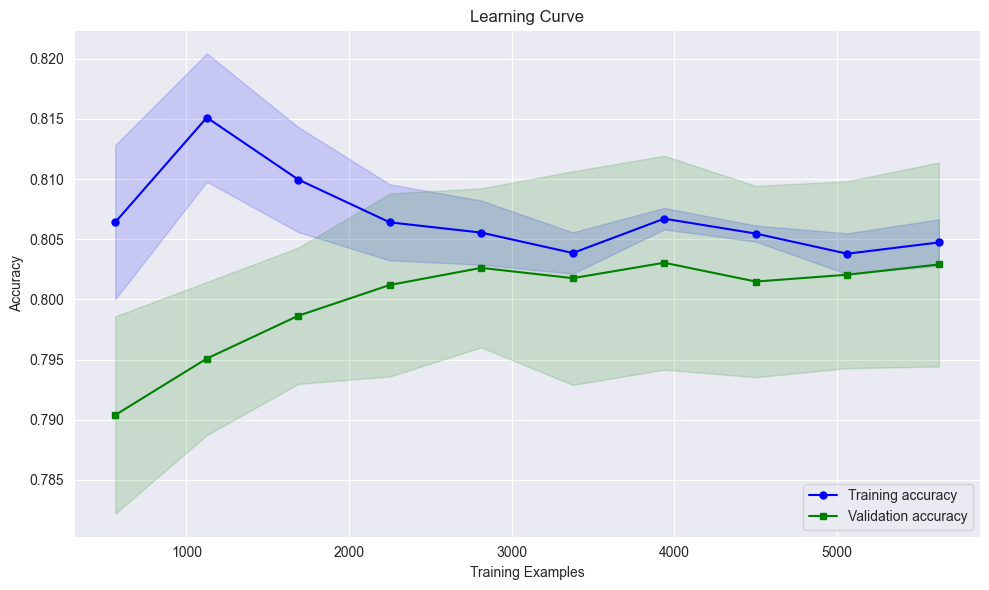

senior_citizen  tenure  monthly_charges  total_charges  gender_encoded  partner_encoded  dependents_encoded  phone_service_encoded  multiple_lines_encoded  internet_service_encoded  online_security_encoded  online_backup_encoded  device_protection_encoded  tech_support_encoded  streaming_tv_encoded  streaming_movies_encoded  contract_encoded  paperless_billing_encoded  payment_method_encoded  prediction
2478               0      60           110.80        6640.70               0                1                   0                      1                       2                         1                        0                      2                          2                     2                     2                         2                 2                          1                       1           0
6783               0       8            94.00         773.65               1                0                   0                      1                       2                         1                        0                      2                          2                     0                     2                         0                 0                          1                       2           1
6125               0       3            80.50         232.35               0                0                   0                      1                       0                         1                        0                      0                          0                     0                     2                         0                 0                          1                       2           1
3051               0       6            80.50         502.85               0                1                   1                      1                       2                         1                        0                      0                          0                     2                     0                         0                 0                          1                       2           1
4100               0      12            67.25         832.30               1                0                   0                      1                       2                         0                        2                      2                          0                     2                     0                         0                 0                          1                       2           0

senior_citizen  tenure  monthly_charges  total_charges  gender_encoded  partner_encoded  dependents_encoded  phone_service_encoded  multiple_lines_encoded  internet_service_encoded  online_security_encoded  online_backup_encoded  device_protection_encoded  tech_support_encoded  streaming_tv_encoded  streaming_movies_encoded  contract_encoded  paperless_billing_encoded  payment_method_encoded  prediction
2478               0      60           110.80        6640.70               0                1                   0                      1                       2                         1                        0                      2                          2                     2                     2                         2                 2                          1                       1           0
6783               0       8            94.00         773.65               1                0                   0                      1                       2                         1                        0                      2                          2                     0                     2                         0                 0                          1                       2           1
6125               0       3            80.50         232.35               0                0                   0                      1                       0                         1                        0                      0                          0                     0                     2                         0                 0                          1                       2           1
3051               0       6            80.50         502.85               0                1                   1                      1                       2                         1                        0                      0                          0                     2                     0                         0                 0                          1                       2           1
4100               0      12            67.25         832.30               1                0                   0                      1                       2                         0                        2                      2                          0                     2                     0                         0                 0                          1                       2           0

senior_citizen  tenure  monthly_charges  total_charges  gender_encoded  partner_encoded  dependents_encoded  phone_service_encoded  multiple_lines_encoded  internet_service_encoded  online_security_encoded  online_backup_encoded  device_protection_encoded  tech_support_encoded  streaming_tv_encoded  streaming_movies_encoded  contract_encoded  paperless_billing_encoded  payment_method_encoded  prediction
2478               0      60           110.80        6640.70               0                1                   0                      1                       2                         1                        0                      2                          2                     2                     2                         2                 2                          1                       1           0
6783               0       8            94.00         773.65               1                0                   0                      1                       2                         1                        0                      2                          2                     0                     2                         0                 0                          1                       2           1
6125               0       3            80.50         232.35               0                0                   0                      1                       0                         1                        0                      0                          0                     0                     2                         0                 0                          1                       2           1
3051               0       6            80.50         502.85               0                1                   1                      1                       2                         1                        0                      0                          0                     2                     0                         0                 0                          1                       2           1
4100               0      12            67.25         832.30               1                0                   0                      1                       2                         0                        2                      2                          0                     2                     0                         0                 0                          1                       2           0

In [42]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
# Prepare the data
X = df.drop(columns=['churn'], axis=1)
y = df['churn']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

feature_names = X_train.columns  # or X.columns
target_names = y_train.values # or y.values 

# Basic model with default parameters 
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

# Evaluate the basic model
print("\n--- Basic Model Performance ---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_lr)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train_lr)}")
print("-" * 127)  

# Basic model with default parameters using pipeline
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42))  # Logistic regression model
])

pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the basic model
print("\n--- Basic Model Performance Using Pipeline---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_pipeline)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train)}")

# Display confusion matrix
print("—- Confusion Matrix: -—")
print(f"Confusion Matrix test set:\n {confusion_matrix(y_test, y_pred_pipeline)}\n")
print(f"Confusion Matrix train set:\n {confusion_matrix(y_train, y_pred_train)}")
print("-" * 127)  

# Hyperparameter tuning with GridSearchCV
print("--- Model With Hyperparameter Tuning ---")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear', 'saga'],  # Algorithm to use
    'classifier__max_iter': [100, 500, 1000],      # Max iterations
    'classifier__class_weight': [None, 'balanced']  # Class weighting
}

# Create grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}\n")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print("-" * 127)  

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_tuned_train = best_model.predict(X_train)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("--- Tuned Model Performance ---")
print(f"Accuracy Tuned Test: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Accuracy Tuned Train: {accuracy_score(y_train, y_pred_tuned_train):.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_tuned),'\n')
print(classification_report(y_train, y_pred_tuned_train))

# Compare basic and tuned models
print("\n--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_scores_tuned = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Cross-Validation Scores: {cv_scores_basic}")
print(f"Tuned Model Cross-Validation Scores: {cv_scores_tuned}\n")
print(f"Basic Model Average CV Score: {cv_scores_basic.mean():.4f} ± {cv_scores_basic.std():.4f}")
print(f"Tuned Model Average CV Score: {cv_scores_tuned.mean():.4f} ± {cv_scores_tuned.std():.4f}")
print("-" * 127)  

# Plot ROC curve
plt.figure(figsize=(10, 8))

# Calculate ROC curve for basic model using pipeline 
y_prob_basic = pipeline.predict_proba(X_test)[:, 1]
fpr_basic, tpr_basic, _ = roc_curve(y_test, y_prob_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

# Calculate ROC curve for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot both curves
plt.plot(fpr_basic, tpr_basic, color='blue', lw=2, label=f'Basic Model (AUC = {roc_auc_basic:.4f})')
plt.plot(fpr_tuned, tpr_tuned, color='red', lw=2, label=f'Tuned Model (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('roc_curve_comparison.png')
#plt.close() 
plt.show()

# Feature importance
final_model = best_model.named_steps['classifier']
if hasattr(final_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        final_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
print("-" * 127)  

# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred_lr, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_tuned, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_pipeline, 3)
display(pipe_model_df.head())  

## RandomForestClassifier

Dataset shape: (7032, 19)
Feature names: Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'gender_encoded', 'partner_encoded', 'dependents_encoded', 'phone_service_encoded', 'multiple_lines_encoded', 'internet_service_encoded', 'online_security_encoded', 'online_backup_encoded', 'device_protection_encoded', 'tech_support_encoded', 'streaming_tv_encoded', 'streaming_movies_encoded', 'contract_encoded', 'paperless_billing_encoded', 'payment_method_encoded'], dtype='object')
Number of classes: 2
Class distribution: [5163 1869]

X Train shape: (5625, 19)
Y Train shape: (5625,)
X Test shape: (1407, 19)
Y Test shape: (1407,)
-------------------------------------------------------------------------------------------------------------------------------
--- Baseline Random Forest Results ---
Accuracy Test set: 0.8024
Accuracy Train set: 0.9975
Classification Report:
Classification Report Test: 
               precision    recall  f1-score   support

           0       0.84

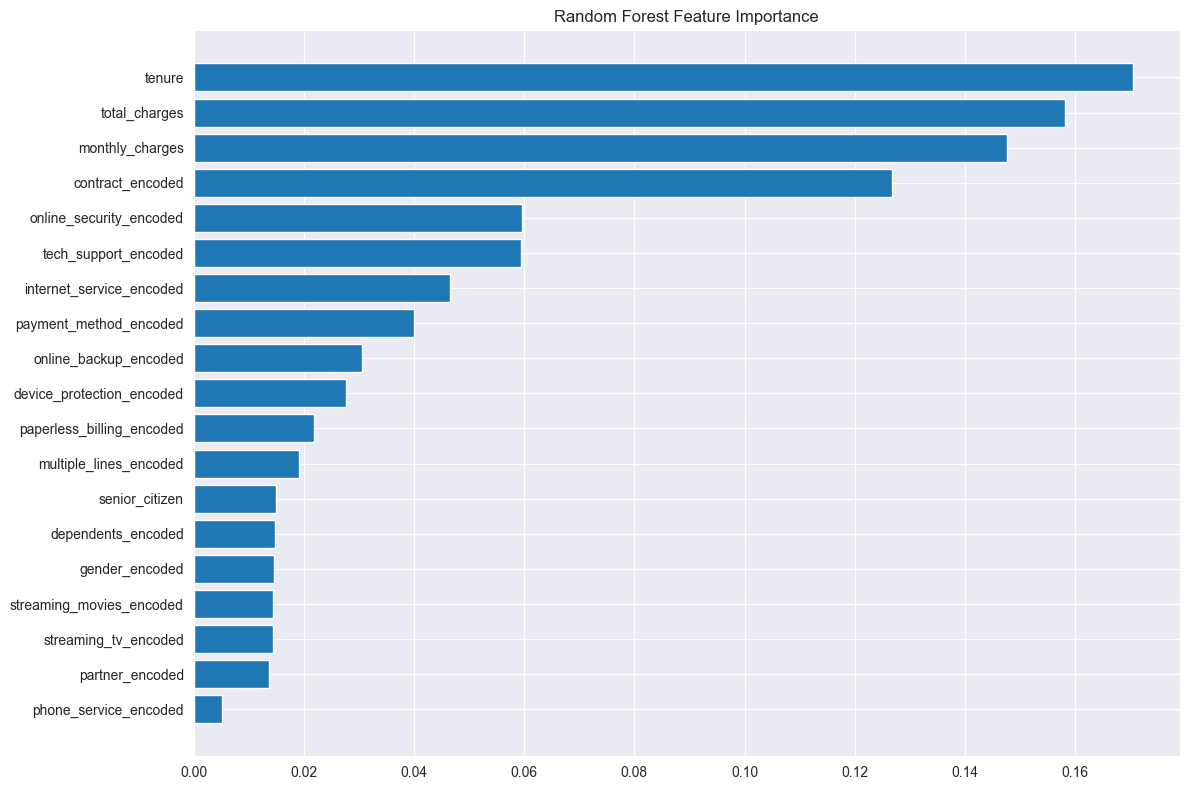

Cross-validation scores: [0.79022222 0.80533333 0.78133333 0.79822222 0.79111111]
Mean CV accuracy: 0.7932
Standard deviation: 0.0081
-------------------------------------------------------------------------------------------------------------------------------


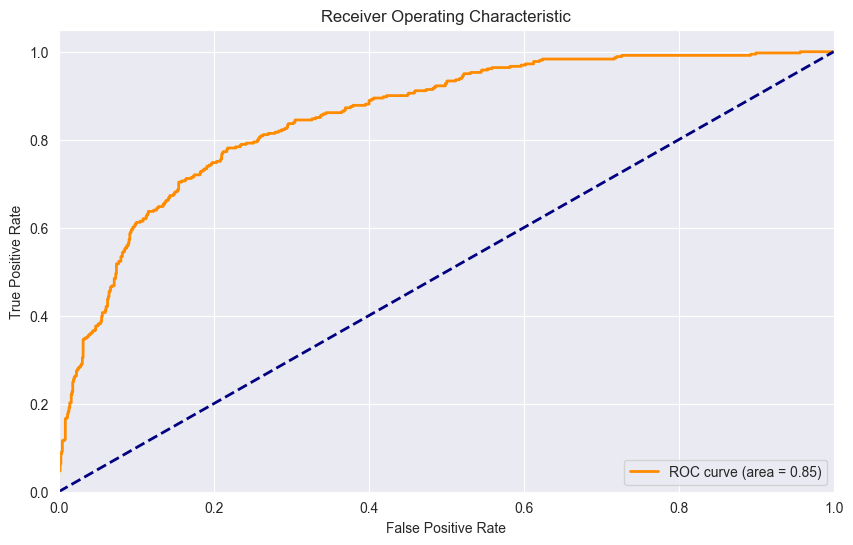

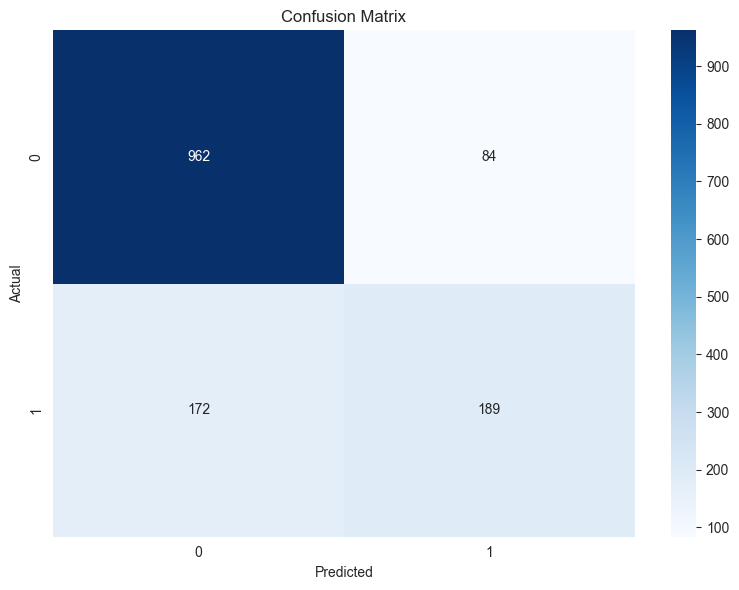

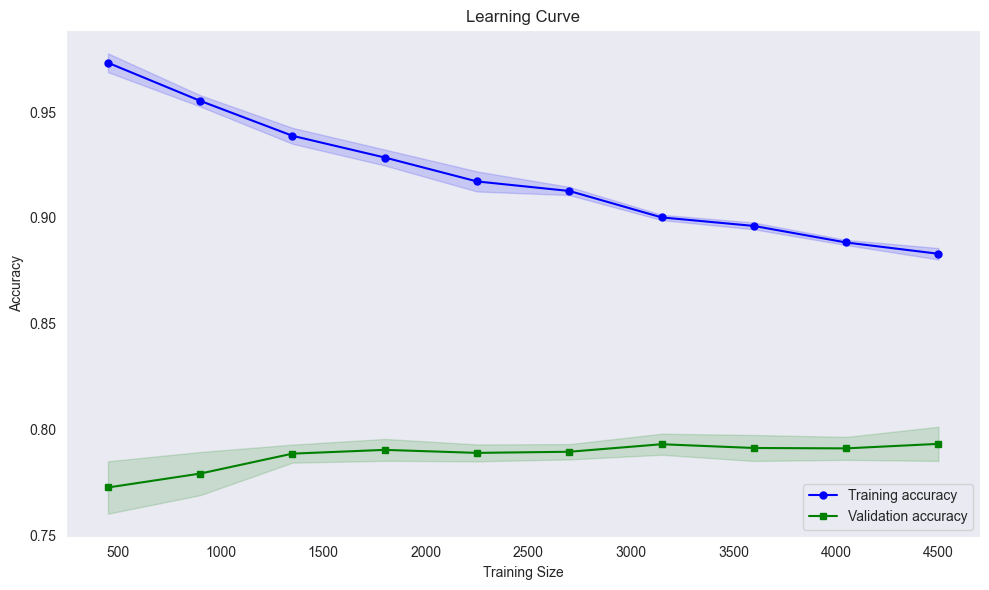

--- Fine-tuning n_estimators ---
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fine-tuned n_estimators: 190
Fine-tuned accuracy: 0.7943
-------------------------------------------------------------------------------------------------------------------------------
--- Final Optimized Model Results ---
Final parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 190}
Accuracy Test: 0.8188
Accuracy Train: 0.8748
Classification Report:

Classification Report Test: 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1046
           1       0.69      0.53      0.60       361

    accuracy                           0.82      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407
 

Classification Report Train: 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      4117
           1       0.83      0.67 

senior_citizen  tenure  monthly_charges  total_charges  gender_encoded  partner_encoded  dependents_encoded  phone_service_encoded  multiple_lines_encoded  internet_service_encoded  online_security_encoded  online_backup_encoded  device_protection_encoded  tech_support_encoded  streaming_tv_encoded  streaming_movies_encoded  contract_encoded  paperless_billing_encoded  payment_method_encoded  prediction
2478               0      60           110.80        6640.70               0                1                   0                      1                       2                         1                        0                      2                          2                     2                     2                         2                 2                          1                       1           0
6783               0       8            94.00         773.65               1                0                   0                      1                       2                         1                        0                      2                          2                     0                     2                         0                 0                          1                       2           1
6125               0       3            80.50         232.35               0                0                   0                      1                       0                         1                        0                      0                          0                     0                     2                         0                 0                          1                       2           1
3051               0       6            80.50         502.85               0                1                   1                      1                       2                         1                        0                      0                          0                     2                     0                         0                 0                          1                       2           0
4100               0      12            67.25         832.30               1                0                   0                      1                       2                         0                        2                      2                          0                     2                     0                         0                 0                          1                       2           0

senior_citizen  tenure  monthly_charges  total_charges  gender_encoded  partner_encoded  dependents_encoded  phone_service_encoded  multiple_lines_encoded  internet_service_encoded  online_security_encoded  online_backup_encoded  device_protection_encoded  tech_support_encoded  streaming_tv_encoded  streaming_movies_encoded  contract_encoded  paperless_billing_encoded  payment_method_encoded  prediction
2478               0      60           110.80        6640.70               0                1                   0                      1                       2                         1                        0                      2                          2                     2                     2                         2                 2                          1                       1           0
6783               0       8            94.00         773.65               1                0                   0                      1                       2                         1                        0                      2                          2                     0                     2                         0                 0                          1                       2           1
6125               0       3            80.50         232.35               0                0                   0                      1                       0                         1                        0                      0                          0                     0                     2                         0                 0                          1                       2           1
3051               0       6            80.50         502.85               0                1                   1                      1                       2                         1                        0                      0                          0                     2                     0                         0                 0                          1                       2           1
4100               0      12            67.25         832.30               1                0                   0                      1                       2                         0                        2                      2                          0                     2                     0                         0                 0                          1                       2           0

senior_citizen  tenure  monthly_charges  total_charges  gender_encoded  partner_encoded  dependents_encoded  phone_service_encoded  multiple_lines_encoded  internet_service_encoded  online_security_encoded  online_backup_encoded  device_protection_encoded  tech_support_encoded  streaming_tv_encoded  streaming_movies_encoded  contract_encoded  paperless_billing_encoded  payment_method_encoded  prediction
2478               0      60           110.80        6640.70               0                1                   0                      1                       2                         1                        0                      2                          2                     2                     2                         2                 2                          1                       1           0
6783               0       8            94.00         773.65               1                0                   0                      1                       2                         1                        0                      2                          2                     0                     2                         0                 0                          1                       2           1
6125               0       3            80.50         232.35               0                0                   0                      1                       0                         1                        0                      0                          0                     0                     2                         0                 0                          1                       2           1
3051               0       6            80.50         502.85               0                1                   1                      1                       2                         1                        0                      0                          0                     2                     0                         0                 0                          1                       2           1
4100               0      12            67.25         832.30               1                0                   0                      1                       2                         0                        2                      2                          0                     2                     0                         0                 0                          1                       2           0

In [48]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = df.drop(columns=['churn'], axis=1)
y = df['churn']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Features and target names
feature_names = X.columns
target_names = ['0', '1']

# Feature scaling (optional for RandomForest but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Basic Random Forest model (baseline)
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_scaled, y_train)
y_pred_base = rf_base.predict(X_test_scaled)
y_pred_base_train = rf_base.predict(X_train_scaled)

print("--- Baseline Random Forest Results ---")
print(f"Accuracy Test set: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Accuracy Train set: {accuracy_score(y_train, y_pred_base_train):.4f}")
print("Classification Report:")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_base, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_base_train, target_names=target_names))
print('-' *127)

# 2. GridSearchCV for hyperparameter tuning
print("--- Grid Search Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use smaller param_grid for demonstration purposes (to avoid long execution time)
small_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=small_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print('-' *127)

# 3. RandomizedSearchCV (more efficient for large parameter spaces)
print("--- Randomized Search Hyperparameter Tuning ---")
random_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None] + list(np.arange(10, 50, 10)),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    random_state=42
)

randomized_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {randomized_search.best_params_}")
print(f"Best cross-validation score: {randomized_search.best_score_:.4f}")
print('-' *127)

# 4. Evaluate the best model from GridSearchCV
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)
y_pred_grid_train = best_grid_model.predict(X_train_scaled)
y_prob_grid = best_grid_model.predict_proba(X_test_scaled)[:, 1]

print("--- Best Grid Search Model Evaluation ---")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_grid_train):.4f}")
print("Classification Report:\n")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_grid, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_grid_train, target_names=target_names))
print('-' *127)

# 5. Feature importance analysis
feature_importances = best_grid_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show()

# 6. Cross-validation of the best model
cv_scores = cross_val_score(best_grid_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *127)

# 7. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_grid)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig('roc_curve.png')
#plt.close()
plt.show()

# 8. Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
#plt.savefig('confusion_matrix.png')
#plt.close()
plt.show()

# 9. Learning curves (optional for deeper analysis)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_grid_model, X_train_scaled, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# 10. Fine-tuning specific parameters (optional based on previous findings)
# For example, fine-tuning n_estimators after discovering optimal ranges
print("--- Fine-tuning n_estimators ---")
estimator_range = np.arange(best_grid_model.n_estimators - 50, best_grid_model.n_estimators + 60, 10)
estimator_range = estimator_range[estimator_range > 0]  # Ensure positive values

param_grid_fine = {
    'n_estimators': estimator_range
}

# Create a new RF with the best parameters from before
rf_fine = RandomForestClassifier(
    random_state=42,
    max_depth=best_grid_model.max_depth,
    min_samples_split=best_grid_model.min_samples_split,
    # Add other parameters from best_grid_model as needed
)

grid_search_fine = GridSearchCV(
    estimator=rf_fine,
    param_grid=param_grid_fine,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search_fine.fit(X_train_scaled, y_train)
print(f"Fine-tuned n_estimators: {grid_search_fine.best_params_['n_estimators']}")
print(f"Fine-tuned accuracy: {grid_search_fine.best_score_:.4f}")
print('-' *127)

# 11. Final model with all optimized parameters
final_params = grid_search.best_params_.copy()
final_params['n_estimators'] = grid_search_fine.best_params_['n_estimators']

final_model = RandomForestClassifier(random_state=42, **final_params)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)
y_pred_final_train = final_model.predict(X_train_scaled)

print("--- Final Optimized Model Results ---")
print(f"Final parameters: {final_params}")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_final_train):.4f}")
print("Classification Report:\n")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_final, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_final_train, target_names=target_names))
print('-' *127)

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred_base, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_grid, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_final, 3)
display(pipe_model_df.head())  

## XGBClassifier

In [64]:
# 1. Basic Manual Tuning
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Prepare the data
X = df.drop(columns=['churn'], axis=1)
y = df['churn']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Basic XGBoost with default parameters
xgb_default = xgb.XGBClassifier(random_state=42)
xgb_default.fit(X_train, y_train)
y_pred = xgb_default.predict(X_test)
y_pred_train = xgb_default.predict(X_train)
print(f"Default accuracy test: {accuracy_score(y_test, y_pred):.4f}")
print(f"Default accuracy train: {accuracy_score(y_train, y_pred_train):.4f}")

# Manual tuning - trying different parameter combinations
xgb_tuned = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_tuned.fit(X_train, y_train)
y_pred_tuned = xgb_tuned.predict(X_test)
y_pred_tuned_train = xgb_tuned.predict(X_train)
print(f"Manually tuned test accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Manually tuned train accuracy: {accuracy_score(y_train, y_pred_tuned_train):.4f}")
print("-" * 127)  

## 2. Grid Search with Cross-Validation
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)
y_pred_grid_train = best_model.predict(X_train)
print(f"Grid search test accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Grid search train accuracy: {accuracy_score(y_train, y_pred_grid_train):.4f}")
print("-" * 127)  

## 3. Randomized Search (More Efficient)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distributions
param_distributions = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)
print("-" * 127)   

## 4. Bayesian Optimization with Optuna
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'random_state': 42,
        'eval_metric': 'logloss'
    }
    
    # Create model and evaluate
    model = xgb.XGBClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best score:", study.best_value)
print("-" * 127)   

# Train final model with best parameters
best_xgb = xgb.XGBClassifier(**study.best_params)
best_xgb.fit(X_train, y_train)

## 5. Progressive Tuning Strategy
# Step 1: Tune number of estimators first
def tune_n_estimators():
    param_grid = {'n_estimators': [50, 100, 200, 300, 500]}
    
    grid_search = GridSearchCV(
        xgb.XGBClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_['n_estimators']

# Step 2: Tune max_depth and learning_rate
def tune_depth_and_lr(n_estimators):
    param_grid = {
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
    }
    
    grid_search = GridSearchCV(
        xgb.XGBClassifier(n_estimators=n_estimators, random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Step 3: Tune regularization and sampling parameters
def tune_regularization(best_params):
    param_grid = {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.1, 0.5, 1],
        'reg_lambda': [0, 0.1, 0.5, 1]
    }
    
    grid_search = GridSearchCV(
        xgb.XGBClassifier(**best_params, random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Execute progressive tuning
best_n_estimators = tune_n_estimators()
print(f"Best n_estimators: {best_n_estimators}")

depth_lr_params = tune_depth_and_lr(best_n_estimators)
print(f"Best depth and learning rate: {depth_lr_params}")
print("-" * 127)   

# Combine parameters
combined_params = {'n_estimators': best_n_estimators}
combined_params.update(depth_lr_params)

final_params = tune_regularization(combined_params)
combined_params.update(final_params)

print(f"Final best parameters: {combined_params}")
print("-" * 127)   

# 6. Using Early Stopping
# Split training data for early stopping
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# XGBoost with early stopping
xgb_early = xgb.XGBClassifier(
    n_estimators=1000,  # Large number
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    early_stopping_rounds=10,
    eval_metric='logloss'
)

# Fit with early stopping
xgb_early.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    verbose=False
)

print(f"Best iteration: {xgb_early.best_iteration}")
print(f"Best score: {xgb_early.best_score}")
print("-" * 127)  

Dataset shape: (7032, 19)
Feature names: Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'gender_encoded', 'partner_encoded', 'dependents_encoded', 'phone_service_encoded', 'multiple_lines_encoded', 'internet_service_encoded', 'online_security_encoded', 'online_backup_encoded', 'device_protection_encoded', 'tech_support_encoded', 'streaming_tv_encoded', 'streaming_movies_encoded', 'contract_encoded', 'paperless_billing_encoded', 'payment_method_encoded'], dtype='object')
Number of classes: 2
Class distribution: [5163 1869]

X Train shape: (5625, 19)
Y Train shape: (5625,)
X Test shape: (1407, 19)
Y Test shape: (1407,)
-------------------------------------------------------------------------------------------------------------------------------
Default accuracy test: 0.8010
Default accuracy train: 0.9408
Manually tuned test accuracy: 0.7982
Manually tuned train accuracy: 0.9452
---------------------------------------------------------------------------------------

[I 2025-08-10 14:10:52,539] A new study created in memory with name: no-name-62d49b93-9a04-46fa-9f0f-aad23e2ceb58


Best parameters: {'colsample_bytree': 0.7556806714936652, 'learning_rate': 0.013251295444089508, 'max_depth': 3, 'n_estimators': 452, 'reg_alpha': 0.09128667678613356, 'reg_lambda': 0.31931363759041487, 'subsample': 0.980024786820322}
Best cross-validation score: 0.7992888888888888
-------------------------------------------------------------------------------------------------------------------------------


[I 2025-08-10 14:10:53,552] Trial 0 finished with value: 0.7777777777777777 and parameters: {'n_estimators': 70, 'max_depth': 9, 'learning_rate': 0.12059975486984996, 'subsample': 0.6973993496392296, 'colsample_bytree': 0.9270832875913538, 'reg_alpha': 0.27504518020725166, 'reg_lambda': 0.15619040442247067}. Best is trial 0 with value: 0.7777777777777777.
[I 2025-08-10 14:10:56,467] Trial 1 finished with value: 0.7715555555555556 and parameters: {'n_estimators': 404, 'max_depth': 7, 'learning_rate': 0.10117150130517877, 'subsample': 0.775545312909304, 'colsample_bytree': 0.7595916318712965, 'reg_alpha': 0.7398317830919988, 'reg_lambda': 0.8078191979302154}. Best is trial 0 with value: 0.7777777777777777.
[I 2025-08-10 14:10:57,129] Trial 2 finished with value: 0.7745777777777777 and parameters: {'n_estimators': 58, 'max_depth': 7, 'learning_rate': 0.20453911843420775, 'subsample': 0.8709398696020596, 'colsample_bytree': 0.9082718326472659, 'reg_alpha': 0.5440365262512188, 'reg_lambda':

Best parameters: {'n_estimators': 368, 'max_depth': 3, 'learning_rate': 0.016565829806308534, 'subsample': 0.9369179965958899, 'colsample_bytree': 0.7481682166300774, 'reg_alpha': 0.644122004345747, 'reg_lambda': 0.02942114949449891}
Best score: 0.7996444444444444
-------------------------------------------------------------------------------------------------------------------------------
Best n_estimators: 50
Best depth and learning rate: {'learning_rate': 0.15, 'max_depth': 3}
-------------------------------------------------------------------------------------------------------------------------------
Final best parameters: {'n_estimators': 50, 'learning_rate': 0.15, 'max_depth': 3, 'colsample_bytree': 0.7, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.6}
-------------------------------------------------------------------------------------------------------------------------------
Best iteration: 33
Best score: 0.41379673954596125
---------------------------------------------

In [ ]:
# Best model 
import time

start_time = time.time()

models = {
    'Logistic Regression': lr,
    'Logistic Regression2': best_model,
    'Random Forest Base': rf_base,
    'Random Forest Best Grid': best_grid_model,
    'Random Forest Final Model': final_model,
    'XGBoost Classifier Default': xgb_default, 
    'XGBoost Classifier Tuned': xgb_tuned,
    'XGBoost Classifier Best XGboost': best_xgb, 
    'XGBoost Classifier Early': xgb_early
}

from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_models(models, X, y, cv=5, scoring='accuracy'):
    results = {}
    
    for model_name, model_list in models.items():
        # Handle single models vs lists of models
        if not isinstance(model_list, list):
            model_list = [model_list]
        
        for i, model in enumerate(model_list):
            # Create unique name for each model variant
            name = f"{model_name}_{i}" if len(model_list) > 1 else model_name
            
            # Perform cross-validation
            scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
            results[name] = {
                'mean_score': scores.mean(),
                'std_score': scores.std(),
                'model': model
            }
    
    return results

# Evaluate all models
results = evaluate_models(models, X_train, y_train)

# Find best model
best_model_name = max(results.keys(), key=lambda k: results[k]['mean_score'])
best_model = results[best_model_name]['model']

print(f"Best Model: {best_model_name}")
print(f"Mean CV Score: {results[best_model_name]['mean_score']:.4f}")
print(f"Std CV Score: {results[best_model_name]['std_score']:.4f}")

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution took {execution_time:.4f} seconds")

## Machine Learning to balance dataset

churn
0    5163
1    1869
Name: count, dtype: int64


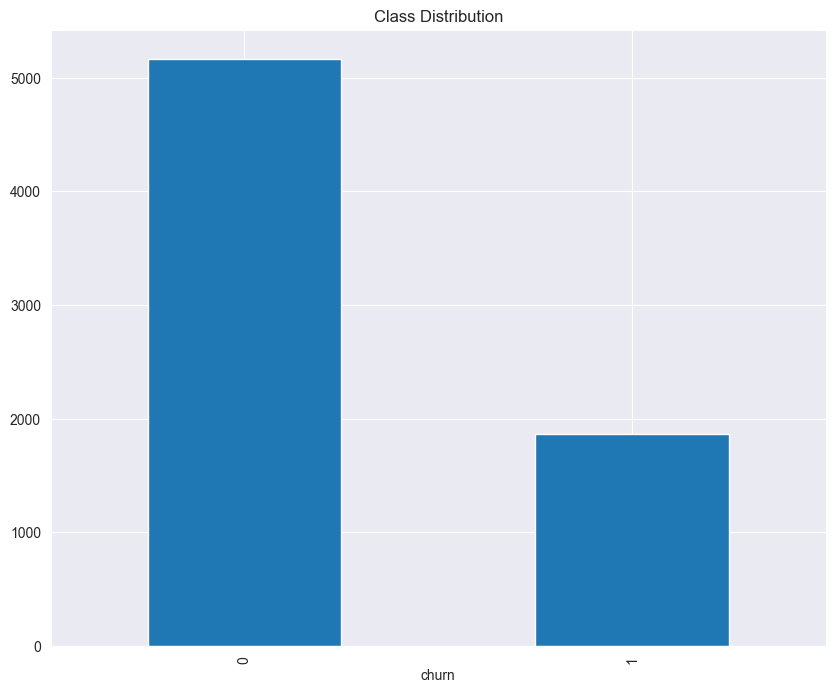

In [52]:
# Visualize imbalance
print(df['churn'].value_counts())
df['churn'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [53]:
# Oversampling (Increase minority class)
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.churn == 0]
df_minority = df[df.churn == 1]

df_minority_upsampled = resample(df_minority, 
                                replace=True,     # sample with replacement
                                n_samples=len(df_majority),    # to match majority class
                                random_state=42)

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

churn
0    5163
1    5163
Name: count, dtype: int64


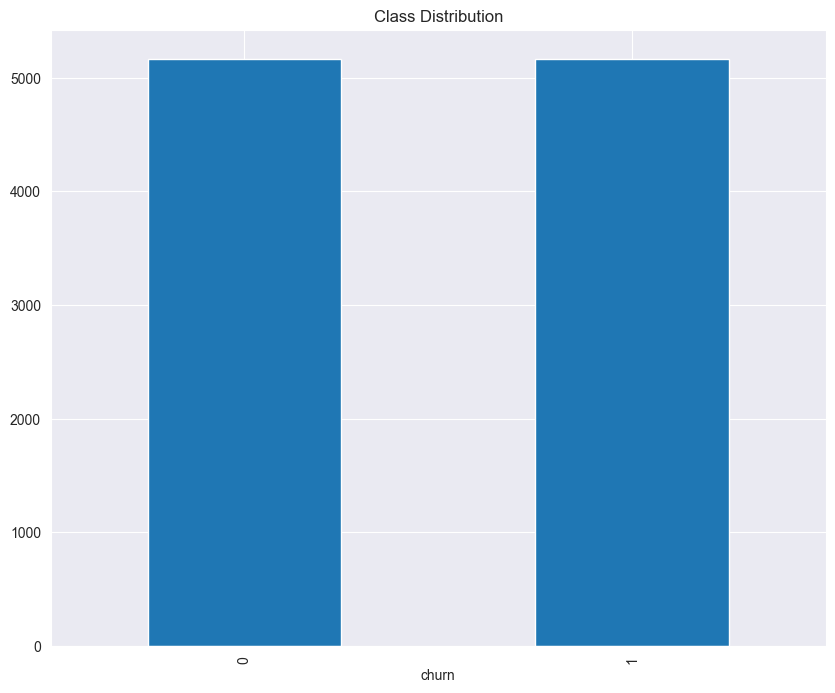

In [56]:
# Visualize imbalance
print(df_balanced['churn'].value_counts())
df_balanced['churn'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [57]:
# Always reset index (it’s a must to do)
df_balanced = df_balanced.reset_index(drop=True)

## LinearRegression

Dataset shape: (10326, 19)
Feature names: Index(['senior_citizen', 'tenure', 'monthly_charges', 'churn', 'gender_encoded', 'partner_encoded', 'dependents_encoded', 'phone_service_encoded', 'multiple_lines_encoded', 'internet_service_encoded', 'online_security_encoded', 'online_backup_encoded', 'device_protection_encoded', 'tech_support_encoded', 'streaming_tv_encoded', 'streaming_movies_encoded', 'contract_encoded', 'paperless_billing_encoded', 'payment_method_encoded'], dtype='object')

X Train shape: (8260, 19)
Y Train shape: (8260,)
X Test shape: (2066, 19)
Y Test shape: (2066,)
-------------------------------------------------------------------------------------------------------------------------------
=== Linear Regression Tuning Examples ===
=== Feature Correlation Analysis ===


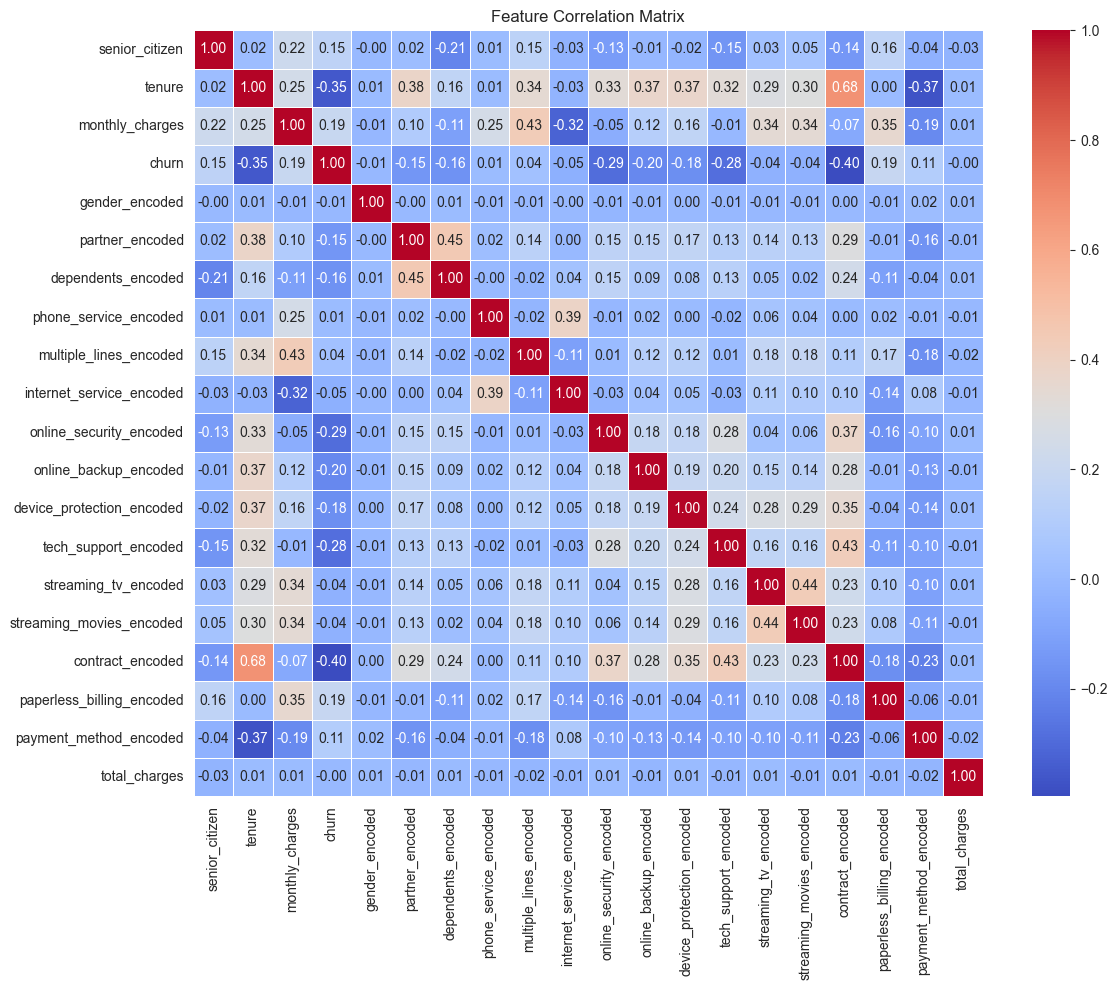

Feature correlation with target (total_charges):
total_charges                1.000000
gender_encoded               0.012748
online_security_encoded      0.011110
tenure                       0.009393
monthly_charges              0.007638
streaming_tv_encoded         0.007603
contract_encoded             0.007293
dependents_encoded           0.007041
device_protection_encoded    0.006220
churn                       -0.001225
phone_service_encoded       -0.007437
tech_support_encoded        -0.010600
streaming_movies_encoded    -0.011248
partner_encoded             -0.012334
paperless_billing_encoded   -0.012350
internet_service_encoded    -0.013052
online_backup_encoded       -0.014554
multiple_lines_encoded      -0.015691
payment_method_encoded      -0.023178
senior_citizen              -0.026687
Name: total_charges, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
=== Cross-Validation ===
Cr

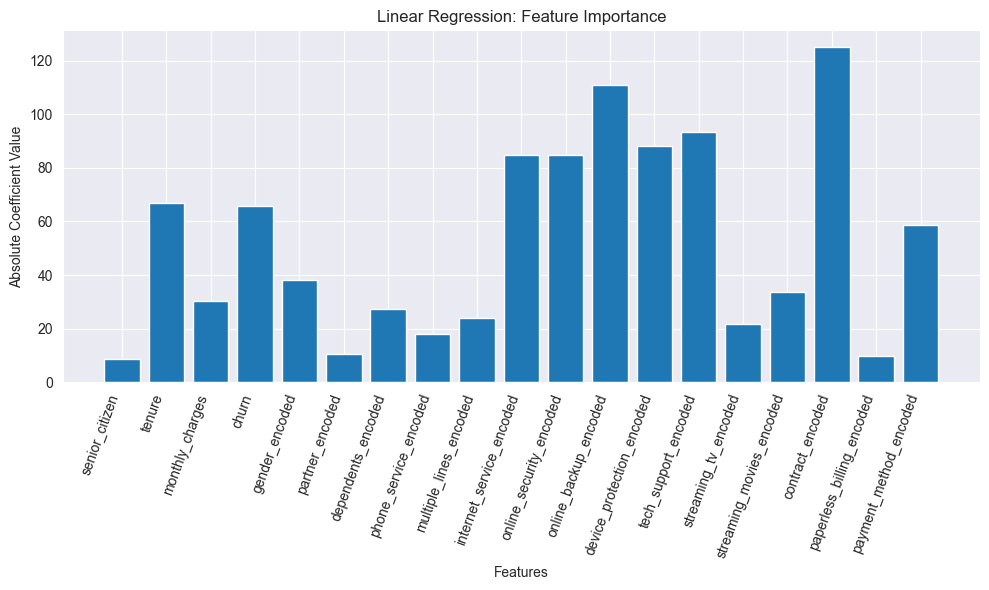

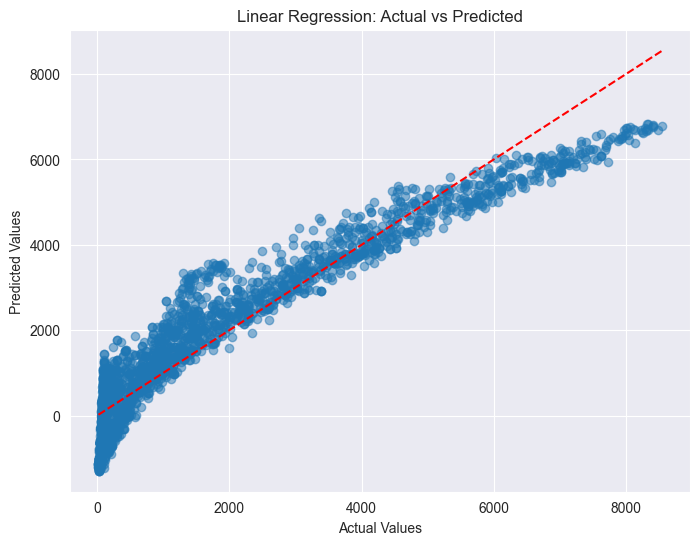

=== Scaled Linear Regression ===
MSE test set: 470251.1389
MSE train set: 447968.9674

R² Score test: 0.9007
R² Score train: 0.9041

MAE test set: 538.0683
MAE train set: 521.7574

Selected Features Coef_: ['senior_citizen' 'tenure' 'monthly_charges' 'churn' 'gender_encoded'
 'partner_encoded' 'dependents_encoded' 'phone_service_encoded'
 'multiple_lines_encoded' 'internet_service_encoded'
 'online_security_encoded' 'online_backup_encoded'
 'device_protection_encoded' 'tech_support_encoded' 'streaming_tv_encoded'
 'streaming_movies_encoded' 'contract_encoded' 'paperless_billing_encoded'
 'payment_method_encoded']
-------------------------------------------------------------------------------------------------------------------------------


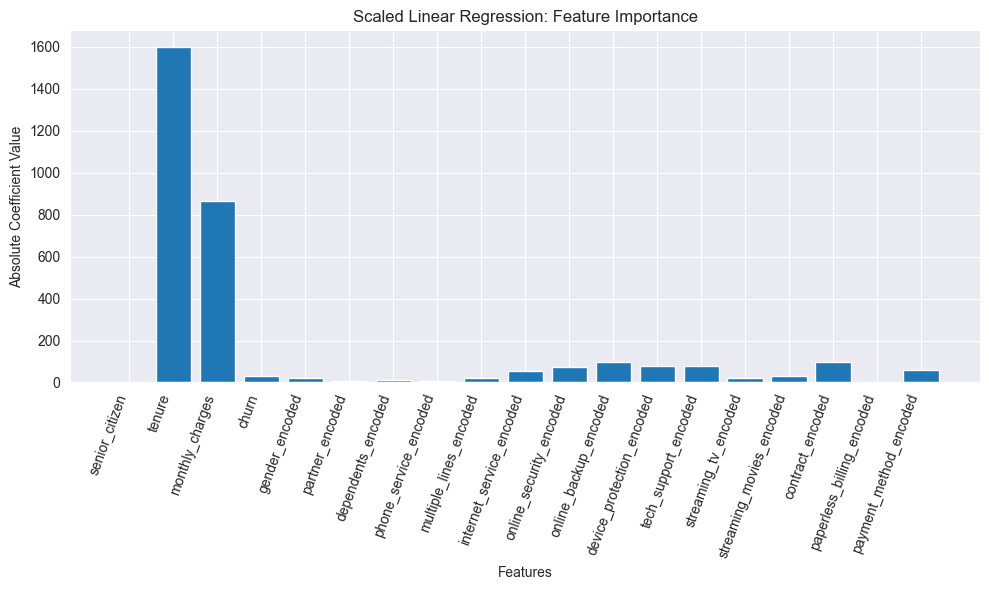

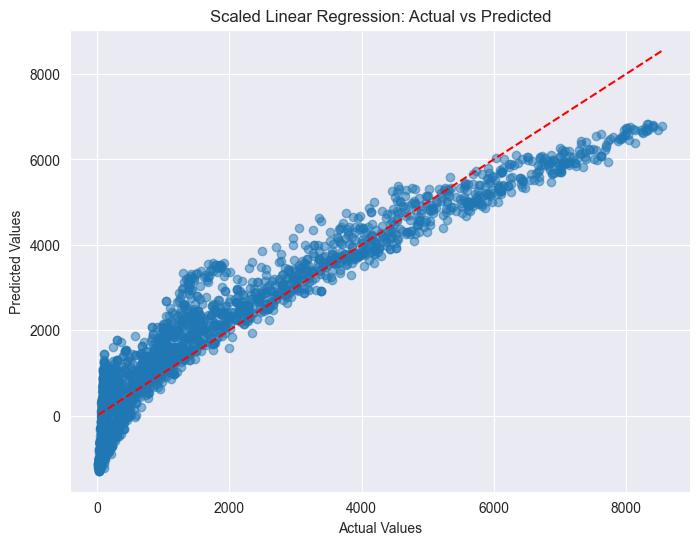

=== Feature Selection (SelectKBest) ===
MSE test set: 515109.0829
MSE train set: 485736.8302

R² Score test: 0.8912
R² Score train: 0.8960

MAE test set: 556.2478
MAE train set: 536.9479

Selected Features Selector : ['tenure' 'monthly_charges' 'multiple_lines_encoded'
 'streaming_movies_encoded' 'contract_encoded']
-------------------------------------------------------------------------------------------------------------------------------


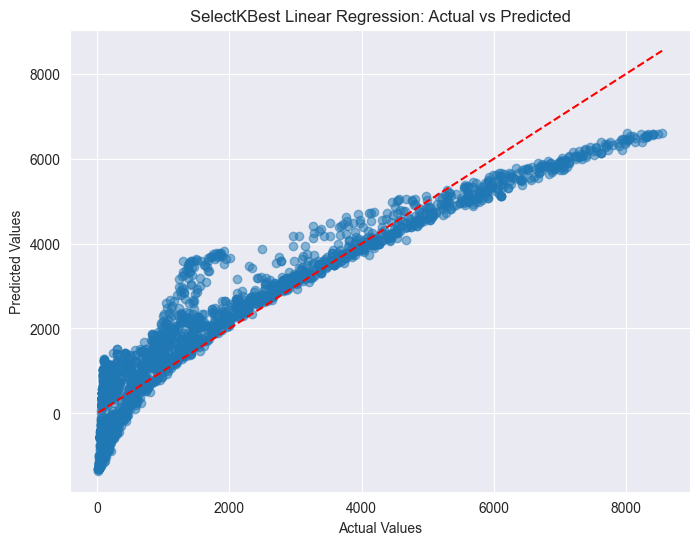

=== Feature Selection (RFE) ===
MSE test set: 490447.1854
MSE train set: 463565.1595

R² Score test: 0.8964
R² Score train: 0.9008

MAE test set: 548.4574
MAE train set: 527.1799

Selected Features Selector : ['tenure' 'monthly_charges' 'online_backup_encoded'
 'device_protection_encoded' 'tech_support_encoded']
-------------------------------------------------------------------------------------------------------------------------------


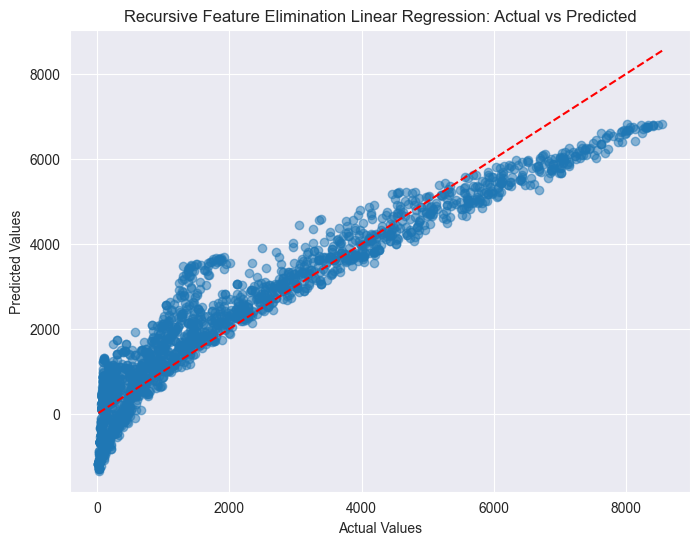

=== Polynomial Regression ===
MSE test set: 3982.0066
MSE train set: 3882.9880

R² Score test: 0.9992
R² Score train: 0.9992

MAE test set: 41.4083
MAE train set: 41.4018

Selected Features Coef_: ['senior_citizen' 'tenure' 'monthly_charges' 'churn' 'gender_encoded'
 'partner_encoded' 'dependents_encoded' 'phone_service_encoded'
 'multiple_lines_encoded' 'internet_service_encoded'
 'online_security_encoded' 'online_backup_encoded'
 'device_protection_encoded' 'tech_support_encoded' 'streaming_tv_encoded'
 'streaming_movies_encoded' 'contract_encoded' 'paperless_billing_encoded'
 'payment_method_encoded' 'senior_citizen^2' 'senior_citizen tenure'
 'senior_citizen monthly_charges' 'senior_citizen churn'
 'senior_citizen gender_encoded' 'senior_citizen partner_encoded'
 'senior_citizen dependents_encoded'
 'senior_citizen phone_service_encoded'
 'senior_citizen multiple_lines_encoded'
 'senior_citizen internet_service_encoded'
 'senior_citizen online_security_encoded'
 'senior_citizen onl

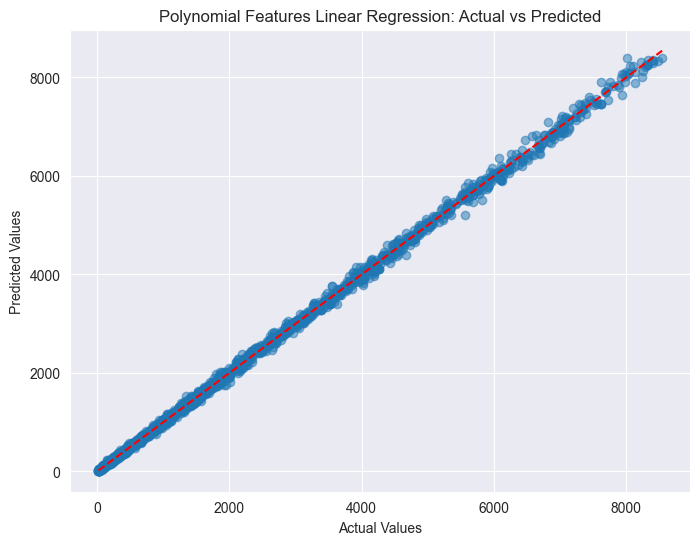

=== Ridge Regression ===
MSE test set:  470262.2921
MSE train set: 447969.0898

R² Score test: 0.9007
R² Score train:0.9041

MAE test set:  538.0915
MAE train set: 521.7768

Best alpha:    1.0000

Selected Features Coef_: ['senior_citizen' 'tenure' 'monthly_charges' 'churn' 'gender_encoded'
 'partner_encoded' 'dependents_encoded' 'phone_service_encoded'
 'multiple_lines_encoded' 'internet_service_encoded'
 'online_security_encoded' 'online_backup_encoded'
 'device_protection_encoded' 'tech_support_encoded' 'streaming_tv_encoded'
 'streaming_movies_encoded' 'contract_encoded' 'paperless_billing_encoded'
 'payment_method_encoded']
-------------------------------------------------------------------------------------------------------------------------------


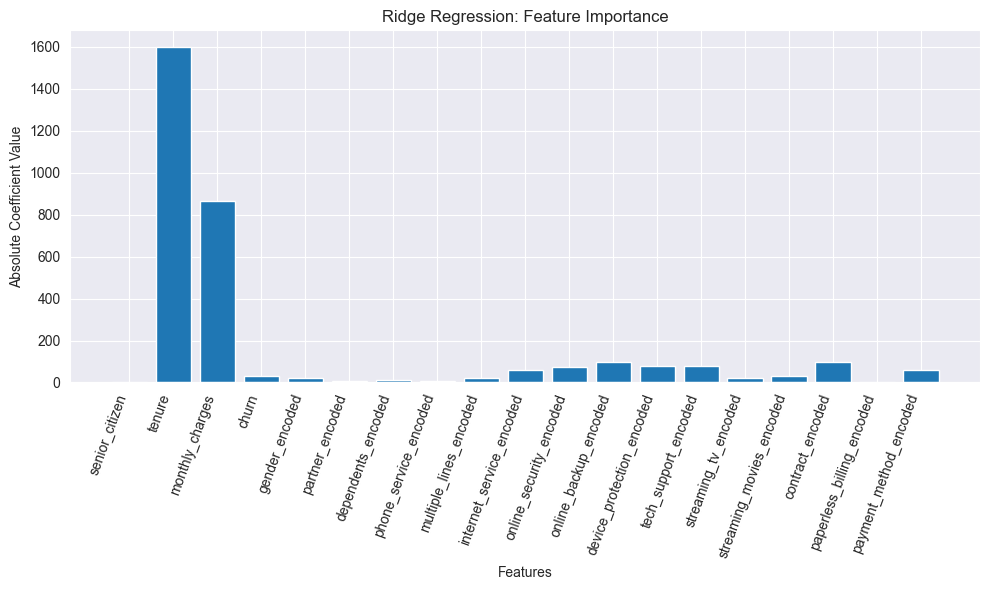

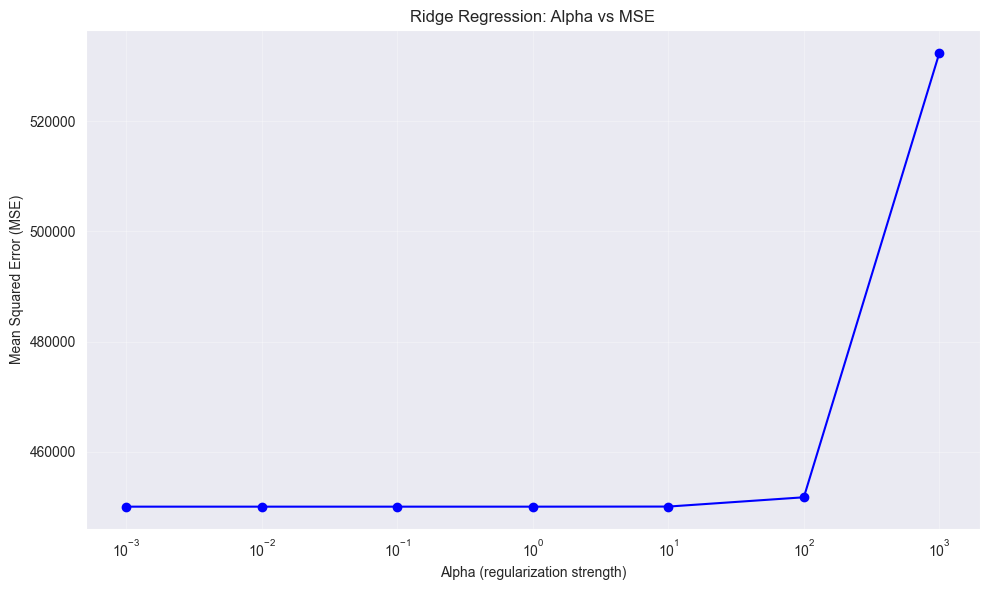

=== Lasso Regression ===
MSE test set: 470410.2456
MSE train set: 447991.5588

R² Score test: 0.9006
R² Score train: 0.9041

MAE test set: 537.9389
MAE train set: 521.5399

Best alpha: 1.0

Selected features: ['senior_citizen' 'tenure' 'monthly_charges' 'churn' 'gender_encoded'
 'partner_encoded' 'dependents_encoded' 'phone_service_encoded'
 'multiple_lines_encoded' 'internet_service_encoded'
 'online_security_encoded' 'online_backup_encoded'
 'device_protection_encoded' 'tech_support_encoded' 'streaming_tv_encoded'
 'streaming_movies_encoded' 'contract_encoded' 'paperless_billing_encoded'
 'payment_method_encoded']
-------------------------------------------------------------------------------------------------------------------------------


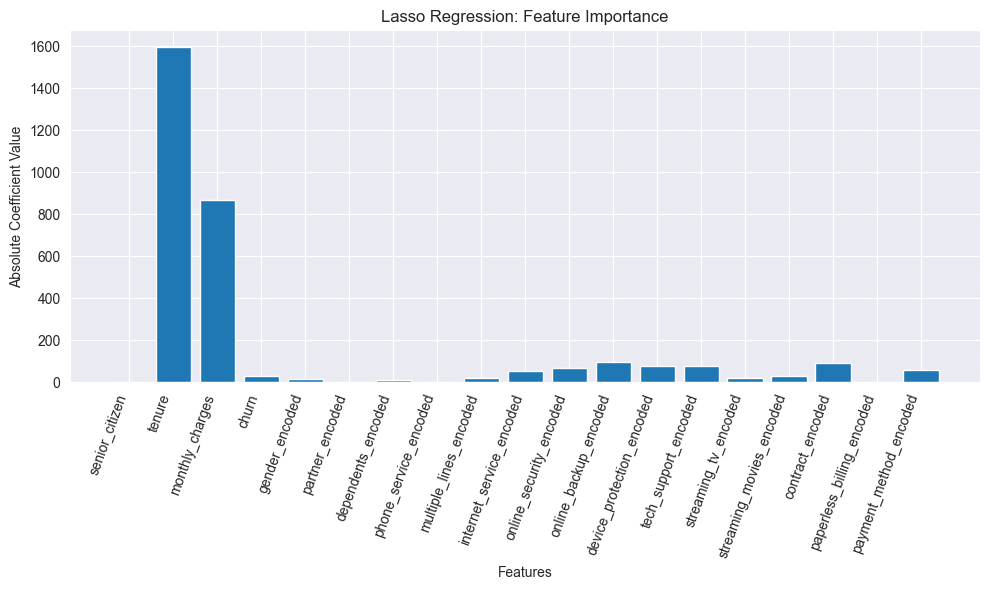

=== Elastic Net Regression ===
MSE test set: 470261.6971
MSE train set: 447969.0618

R² Score test: 0.9007
R² Score train: 0.9041

MAE test set: 538.0859
MAE train set: 521.7712

Best parameters: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.99}

Selected Features Coef_: ['senior_citizen' 'tenure' 'monthly_charges' 'churn' 'gender_encoded'
 'partner_encoded' 'dependents_encoded' 'phone_service_encoded'
 'multiple_lines_encoded' 'internet_service_encoded'
 'online_security_encoded' 'online_backup_encoded'
 'device_protection_encoded' 'tech_support_encoded' 'streaming_tv_encoded'
 'streaming_movies_encoded' 'contract_encoded' 'paperless_billing_encoded'
 'payment_method_encoded']
-------------------------------------------------------------------------------------------------------------------------------


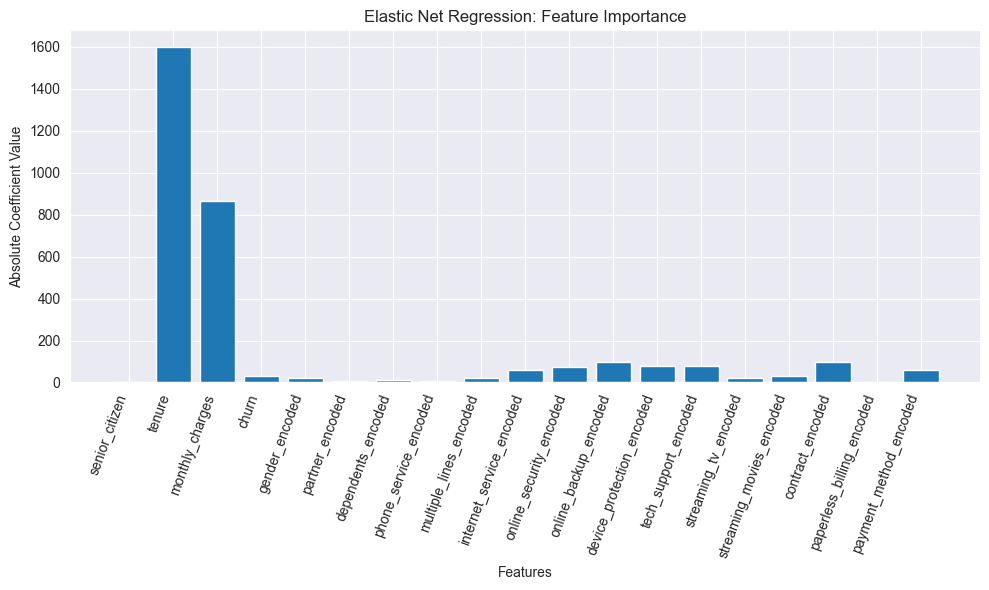

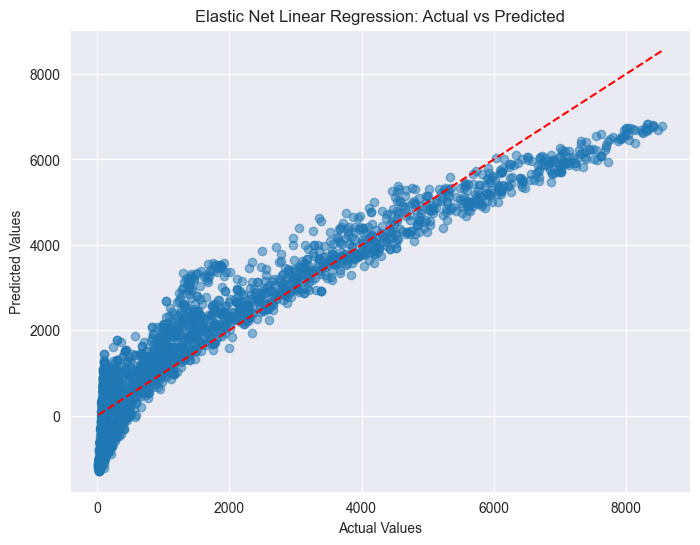

-------------------------------------------------------------------------------------------------------------------------------
=== Model Comparison ===
                                     MAE       MSE          R²
Polynomial Regression        3982.006646  0.999159   41.408334
Basic Linear Regression    470251.138859  0.900667  538.068255
Scaled Linear Regression   470251.138859  0.900667  538.068255
Elastic Net                470261.697069  0.900665  538.085914
Ridge Regression           470262.292137  0.900665  538.091517
Lasso Regression           470410.245636  0.900633  537.938852
Feature Selection (RFE)    490447.185367  0.896401  548.457395
Feature Selection (KBest)  515109.082931  0.891191  556.247795
-------------------------------------------------------------------------------------------------------------------------------
Best model according to MAE: Polynomial Regression
Best model according to MSE: Polynomial Regression
Best model according to RMSE: Polynomial Regressio

In [59]:
# Training & Splitting
X = df_balanced.drop(columns=['total_charges'], axis=1)
y = df_balanced['total_charges']

print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print() 

# For short dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Basic Linear Regression model
def basic_linear_regression():
    print("=== Basic Linear Regression ===")
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n") 
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    
    # Check which features were selected (non-zero coefficients)
    lr_coef = model.coef_
    selected_features = np.array(X_train.columns)[lr_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.show()

    return model, mse_test, r2_test, mae_test

# Feature Scaling
def scaled_linear_regression():
    print("=== Scaled Linear Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    # Check which features were selected (non-zero coefficients)
    scaled_lr_coef = pipeline.named_steps['regression'].coef_
    selected_features = np.array(X_train.columns)[scaled_lr_coef != 0]
    print(f"Selected Features Coef_: {selected_features}") 
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(scaled_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Scaled Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scaled Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with SelectKBest
def feature_selection_kbest():
    print("=== Feature Selection (SelectKBest) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(f_regression, k=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}")
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('SelectKBest Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with Recursive Feature Elimination (RFE)
def feature_selection_rfe():
    print("=== Feature Selection (RFE) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', RFE(LinearRegression(), n_features_to_select=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}") 
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Recursive Feature Elimination Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Polynomial Features
def polynomial_regression():
    print("=== Polynomial Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}") 

    # Get the polynomial feature names
    poly_features = pipeline.named_steps['poly'].get_feature_names_out(X_train.columns)
    
    # Get coefficients from the regression step
    poly_coef = pipeline.named_steps['regression'].coef_
    
    # Find selected features (non-zero coefficients)
    selected_features = poly_features[poly_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Polynomial Features Linear Regression: Actual vs Predicted')
    plt.show()  
    
    return pipeline, mse_test, r2_test, mae_test

# Regularized Linear Regression - Ridge
def ridge_regression():
    print("=== Ridge Regression ===")
    param_grid = {'ridge__alpha': np.logspace(-3, 3, 7)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(random_state=42))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set:  {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train:{r2_train:.4f}\n")
    print(f"MAE test set:  {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    print(f"Best alpha:    {grid_search.best_params_['ridge__alpha']:.4f}")
  
    # Check which features were selected (non-zero coefficients)
    ridge_lr_coef = grid_search.best_estimator_['ridge'].coef_
    selected_features = np.array(X_train.columns)[ridge_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(ridge_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Ridge Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize alpha vs MSE
    plt.figure(figsize=(10, 6))
    results = pd.DataFrame(grid_search.cv_results_)
    alphas = np.array(param_grid['ridge__alpha'])
    scores = -results['mean_test_score']
    plt.semilogx(alphas, scores, 'b-o')
    plt.xlabel('Alpha (regularization strength)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Ridge Regression: Alpha vs MSE')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return best_model, mse_test, r2_test, mae_test

# Regularized Linear Regression - Lasso
def lasso_regression():
    print("=== Lasso Regression ===")
    param_grid = {'lasso__alpha': np.logspace(-3, 1, 5)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")   
    print(f"Best alpha: {grid_search.best_params_['lasso__alpha']}") 
    
    # Check which features were selected (non-zero coefficients)
    lasso_coef = best_model.named_steps['lasso'].coef_
    selected_features = np.array(X_train.columns)[lasso_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lasso_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Lasso Regression: Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return best_model, mse_test, r2_test, mae_test

# Elastic Net
def elastic_net_regression():
    print("=== Elastic Net Regression ===")
    param_grid = {
        'elasticnet__alpha': np.logspace(-3, 1, 5),
        'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
    }
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('elasticnet', ElasticNet(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")    
    print(f"Best parameters: {grid_search.best_params_}")

    # Check which features were selected (non-zero coefficients)
    elastic_lr_coef = grid_search.best_estimator_['elasticnet'].coef_
    selected_features = np.array(X_train.columns)[elastic_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(elastic_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Elastic Net Regression: Feature Importance')
    plt.tight_layout()
    plt.show()  
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Elastic Net Linear Regression: Actual vs Predicted')
    plt.show() 
    print("-" * 127) 
    
    return best_model, mse_test, r2_test, mae_test

# Cross-validation with MAE, MSE, and R² scores
def cross_validation_example():
    print("-" * 127)
    print("=== Cross-Validation ===")
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate different metrics
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    rmse_scores = np.sqrt(mse_scores)
    
    print(f"Cross-Validation MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")
    print(f"Cross-Validation MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
    print(f"Cross-Validation R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
    print("-" * 127) 
    
    return mse_scores, mae_scores, r2_scores, rmse_scores
        
# Compare all models
def compare_models():
    models = {
        'Basic Linear Regression': basic_linear_regression(),
        'Scaled Linear Regression': scaled_linear_regression(),
        'Feature Selection (KBest)': feature_selection_kbest(),
        'Feature Selection (RFE)': feature_selection_rfe(),
        'Polynomial Regression': polynomial_regression(),
        'Ridge Regression': ridge_regression(),
        'Lasso Regression': lasso_regression(),
        'Elastic Net': elastic_net_regression()
    }

    # Extract MSE and R² scores
    results = {name: {'MAE': mae_scores, 'MSE': mse_scores, 'R²': r2_scores} 
           for name, (_, mae_scores, mse_scores, r2_scores) in models.items()} 

    results_df = pd.DataFrame(results).T
    
    # Sort by MSE (lower is better)
    results_df = results_df.sort_values('MSE', ascending=False)
    
    print("=== Model Comparison ===")
    print(results_df)
    print("-" * 127) 
    
    return results_df 

    # Plot comparison
    plt.figure(figsize=(12, 15))  # Increase height for 3 subplots

    plt.subplot(3, 1, 1)  # This now works with 3 rows
    plt.bar(results_df.index, results_df['MAE'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Model Comparison - MAE (lower is better)')
    
    plt.subplot(3, 1, 2)  # Change to 3 rows
    plt.bar(results_df.index, results_df['MSE'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Model Comparison - MSE (lower is better)')
    
    plt.subplot(3, 1, 3)  # Change to 3 rows
    plt.bar(results_df.index, results_df['R²'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('R² Score (higher is better)')
    plt.title('Model Comparison - R² (higher is better)')

    plt.tight_layout()
    plt.show()
    
# Feature Correlation Analysis
def feature_correlation_analysis():
    print("=== Feature Correlation Analysis ===")
    X_df = pd.DataFrame(df, columns=X_train.columns)  # Always change the df value based on the df's name you're using
    X_df['total_charges'] = y_train  # Always change the X_df value 
    
    corr = X_df.corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Sort features by correlation with target
    target_corr = corr['total_charges'].sort_values(ascending=False) # Always change the target_coor value 
    print("Feature correlation with target (total_charges):")  # Always change the variable value 
    print(target_corr)
    
    return corr

# Main execution
if __name__ == "__main__":
    print("=== Linear Regression Tuning Examples ===")
    feature_correlation_analysis()
    cross_validation_example()
    results = compare_models()
    
    print(f"Best model according to MAE: {results.index[0]}")
    print(f"Best model according to MSE: {results.index[0]}")
    print(f"Best model according to RMSE: {results.index[0]}")
    print(f"Best model according to R2_score: {results.index[0]}")
    print("-" * 127) 

## LogisticRegression

Dataset shape: (10326, 19)
Feature names: Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'gender_encoded', 'partner_encoded', 'dependents_encoded', 'phone_service_encoded', 'multiple_lines_encoded', 'internet_service_encoded', 'online_security_encoded', 'online_backup_encoded', 'device_protection_encoded', 'tech_support_encoded', 'streaming_tv_encoded', 'streaming_movies_encoded', 'contract_encoded', 'paperless_billing_encoded', 'payment_method_encoded'], dtype='object')
Number of classes: 2
Class distribution: [5163 5163]

X Train shape: (8260, 19)
Y Train shape: (8260,)
X Test shape: (2066, 19)
Y Test shape: (2066,)
-------------------------------------------------------------------------------------------------------------------------------

--- Basic Model Performance ---
Accuracy test set: 0.7643
Accuracy train set: 0.7636

Classification Report:
Classification Report test set:
               precision    recall  f1-score   support

           0       0.80 

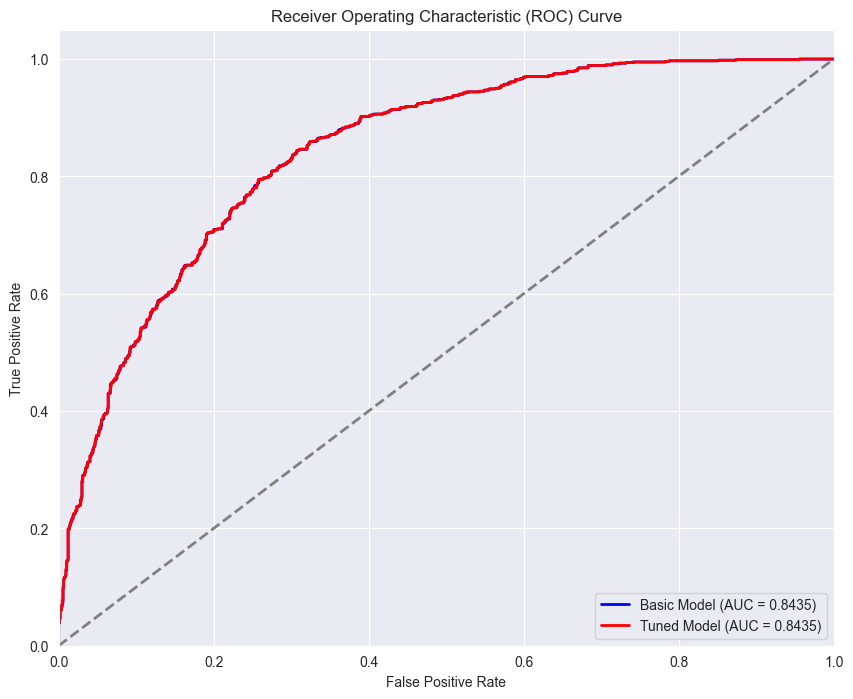

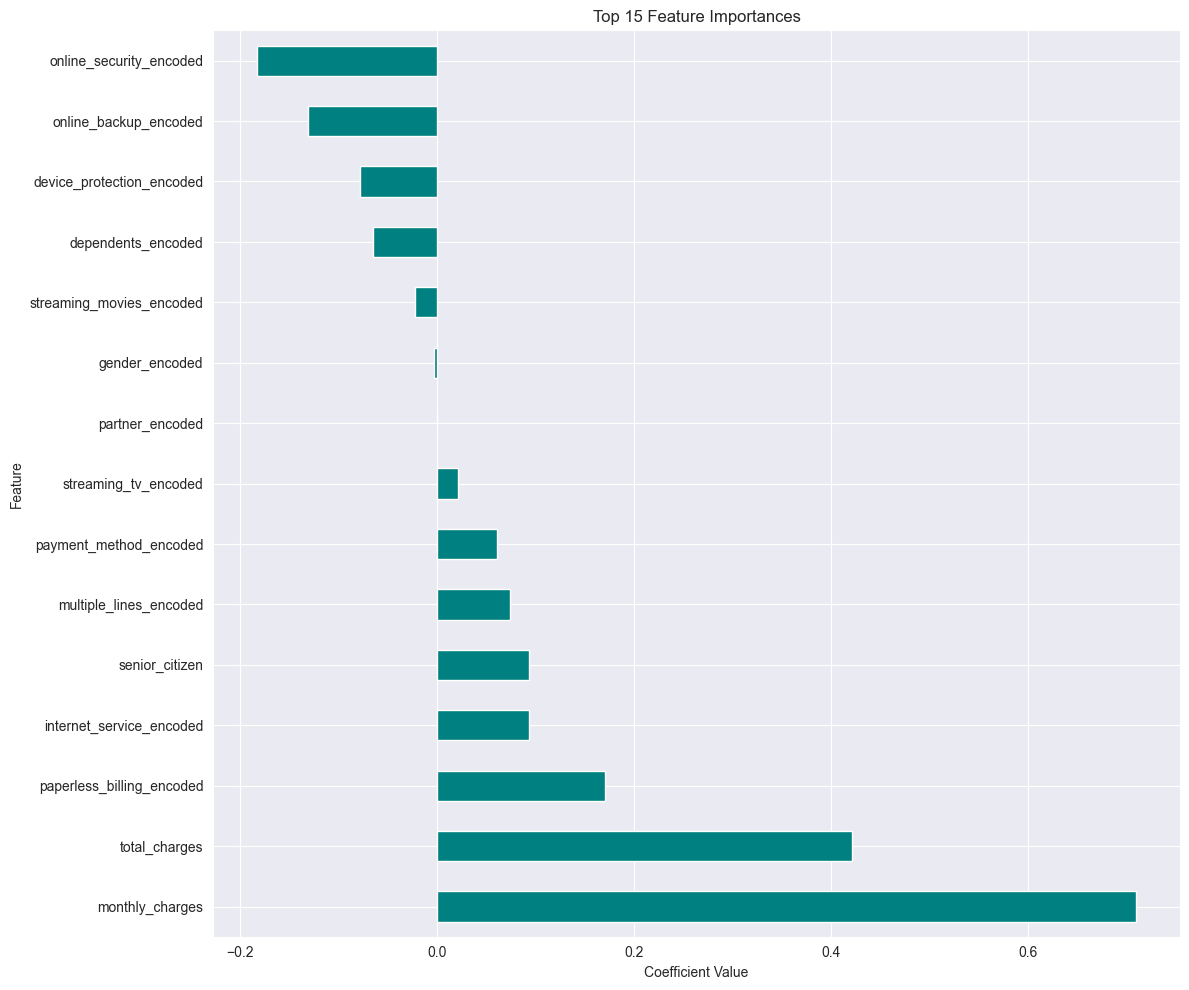

--- Top 10 Most Important Features ---
                           Coefficient
monthly_charges               0.710112
total_charges                 0.421611
paperless_billing_encoded     0.171049
internet_service_encoded      0.093580
senior_citizen                0.092911
multiple_lines_encoded        0.073940
payment_method_encoded        0.061210
streaming_tv_encoded          0.021566
partner_encoded               0.000000
gender_encoded               -0.003532
--- Bottom 10 Least Important Features ---
                           Coefficient
gender_encoded               -0.003532
streaming_movies_encoded     -0.022460
dependents_encoded           -0.065203
device_protection_encoded    -0.078580
online_backup_encoded        -0.131305
online_security_encoded      -0.182894
tech_support_encoded         -0.228628
phone_service_encoded        -0.237112
contract_encoded             -0.549762
tenure                       -1.149025
------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/py

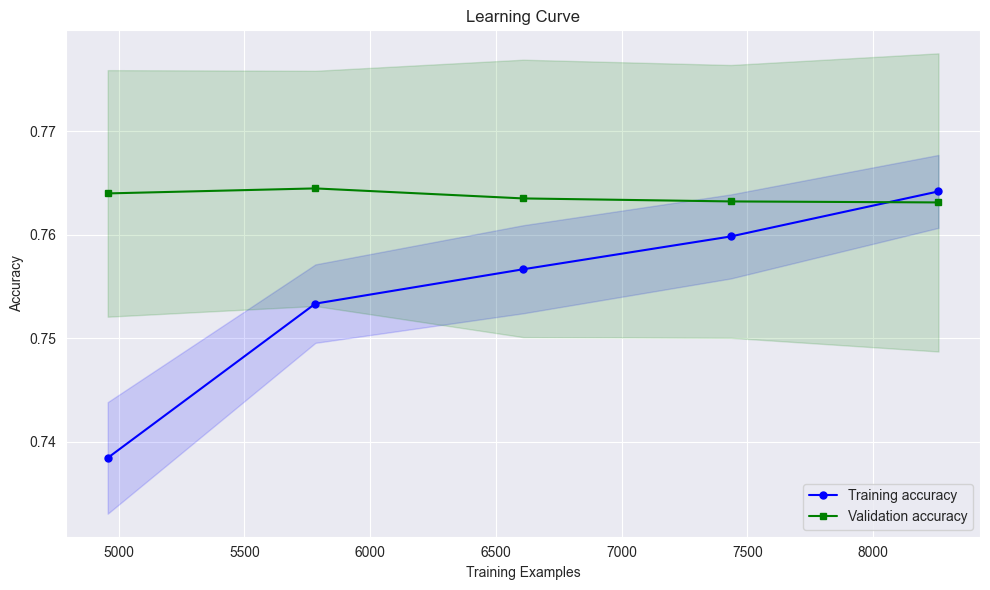

senior_citizen  tenure  monthly_charges  total_charges  gender_encoded  partner_encoded  dependents_encoded  phone_service_encoded  multiple_lines_encoded  internet_service_encoded  online_security_encoded  online_backup_encoded  device_protection_encoded  tech_support_encoded  streaming_tv_encoded  streaming_movies_encoded  contract_encoded  paperless_billing_encoded  payment_method_encoded  prediction
4139               0      56            25.95        1444.05               1                0                   0                      1                       2                         2                        1                      1                          1                     1                     1                         1                 2                          1                       0           0
1692               0      60            44.45        2773.90               0                0                   0                      0                       1                         0                        2                      0                          2                     0                     0                         2                 1                          1                       2           0
2692               0      18            56.80        1074.65               1                1                   0                      1                       2                         0                        0                      2                          0                     0                     0                         0                 0                          0                       1           1
7704               0       1            20.30          20.30               0                0                   0                      1                       0                         2                        1                      1                          1                     1                     1                         1                 0                          1                       3           0
321                0      68            58.25        3975.70               0                1                   0                      1                       2                         0                        2                      0                          0                     2                     0                         0                 1                          0                       0           0

senior_citizen  tenure  monthly_charges  total_charges  gender_encoded  partner_encoded  dependents_encoded  phone_service_encoded  multiple_lines_encoded  internet_service_encoded  online_security_encoded  online_backup_encoded  device_protection_encoded  tech_support_encoded  streaming_tv_encoded  streaming_movies_encoded  contract_encoded  paperless_billing_encoded  payment_method_encoded  prediction
4139               0      56            25.95        1444.05               1                0                   0                      1                       2                         2                        1                      1                          1                     1                     1                         1                 2                          1                       0           0
1692               0      60            44.45        2773.90               0                0                   0                      0                       1                         0                        2                      0                          2                     0                     0                         2                 1                          1                       2           0
2692               0      18            56.80        1074.65               1                1                   0                      1                       2                         0                        0                      2                          0                     0                     0                         0                 0                          0                       1           1
7704               0       1            20.30          20.30               0                0                   0                      1                       0                         2                        1                      1                          1                     1                     1                         1                 0                          1                       3           0
321                0      68            58.25        3975.70               0                1                   0                      1                       2                         0                        2                      0                          0                     2                     0                         0                 1                          0                       0           0

senior_citizen  tenure  monthly_charges  total_charges  gender_encoded  partner_encoded  dependents_encoded  phone_service_encoded  multiple_lines_encoded  internet_service_encoded  online_security_encoded  online_backup_encoded  device_protection_encoded  tech_support_encoded  streaming_tv_encoded  streaming_movies_encoded  contract_encoded  paperless_billing_encoded  payment_method_encoded  prediction
4139               0      56            25.95        1444.05               1                0                   0                      1                       2                         2                        1                      1                          1                     1                     1                         1                 2                          1                       0           0
1692               0      60            44.45        2773.90               0                0                   0                      0                       1                         0                        2                      0                          2                     0                     0                         2                 1                          1                       2           0
2692               0      18            56.80        1074.65               1                1                   0                      1                       2                         0                        0                      2                          0                     0                     0                         0                 0                          0                       1           1
7704               0       1            20.30          20.30               0                0                   0                      1                       0                         2                        1                      1                          1                     1                     1                         1                 0                          1                       3           0
321                0      68            58.25        3975.70               0                1                   0                      1                       2                         0                        2                      0                          0                     2                     0                         0                 1                          0                       0           0

In [60]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
# Prepare the data
X = df_balanced.drop(columns=['churn'], axis=1)
y = df_balanced['churn']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

feature_names = X_train.columns  # or X.columns
target_names = y_train.values # or y.values 

# Basic model with default parameters 
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

# Evaluate the basic model
print("\n--- Basic Model Performance ---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_lr)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train_lr)}")
print("-" * 127)  

# Basic model with default parameters using pipeline
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42))  # Logistic regression model
])

pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the basic model
print("\n--- Basic Model Performance Using Pipeline---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_pipeline)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train)}")

# Display confusion matrix
print("—- Confusion Matrix: -—")
print(f"Confusion Matrix test set:\n {confusion_matrix(y_test, y_pred_pipeline)}\n")
print(f"Confusion Matrix train set:\n {confusion_matrix(y_train, y_pred_train)}")
print("-" * 127)  

# Hyperparameter tuning with GridSearchCV
print("--- Model With Hyperparameter Tuning ---")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear', 'saga'],  # Algorithm to use
    'classifier__max_iter': [100, 500, 1000],      # Max iterations
    'classifier__class_weight': [None, 'balanced']  # Class weighting
}

# Create grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}\n")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print("-" * 127)  

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_tuned_train = best_model.predict(X_train)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("--- Tuned Model Performance ---")
print(f"Accuracy Tuned Test: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Accuracy Tuned Train: {accuracy_score(y_train, y_pred_tuned_train):.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_tuned),'\n')
print(classification_report(y_train, y_pred_tuned_train))

# Compare basic and tuned models
print("\n--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_scores_tuned = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Cross-Validation Scores: {cv_scores_basic}")
print(f"Tuned Model Cross-Validation Scores: {cv_scores_tuned}\n")
print(f"Basic Model Average CV Score: {cv_scores_basic.mean():.4f} ± {cv_scores_basic.std():.4f}")
print(f"Tuned Model Average CV Score: {cv_scores_tuned.mean():.4f} ± {cv_scores_tuned.std():.4f}")
print("-" * 127)  

# Plot ROC curve
plt.figure(figsize=(10, 8))

# Calculate ROC curve for basic model using pipeline 
y_prob_basic = pipeline.predict_proba(X_test)[:, 1]
fpr_basic, tpr_basic, _ = roc_curve(y_test, y_prob_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

# Calculate ROC curve for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot both curves
plt.plot(fpr_basic, tpr_basic, color='blue', lw=2, label=f'Basic Model (AUC = {roc_auc_basic:.4f})')
plt.plot(fpr_tuned, tpr_tuned, color='red', lw=2, label=f'Tuned Model (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('roc_curve_comparison.png')
#plt.close() 
plt.show()

# Feature importance
final_model = best_model.named_steps['classifier']
if hasattr(final_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        final_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
print("-" * 127)  

# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred_lr, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_tuned, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_pipeline, 3)
display(pipe_model_df.head())  

## RandomForestClassifier

Dataset shape: (10326, 19)
Feature names: Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'gender_encoded', 'partner_encoded', 'dependents_encoded', 'phone_service_encoded', 'multiple_lines_encoded', 'internet_service_encoded', 'online_security_encoded', 'online_backup_encoded', 'device_protection_encoded', 'tech_support_encoded', 'streaming_tv_encoded', 'streaming_movies_encoded', 'contract_encoded', 'paperless_billing_encoded', 'payment_method_encoded'], dtype='object')
Number of classes: 2
Class distribution: [5163 5163]

X Train shape: (8260, 19)
Y Train shape: (8260,)
X Test shape: (2066, 19)
Y Test shape: (2066,)
-------------------------------------------------------------------------------------------------------------------------------
--- Baseline Random Forest Results ---
Accuracy Test set: 0.8974
Accuracy Train set: 0.9984
Classification Report:
Classification Report Test: 
               precision    recall  f1-score   support

           0       0.9

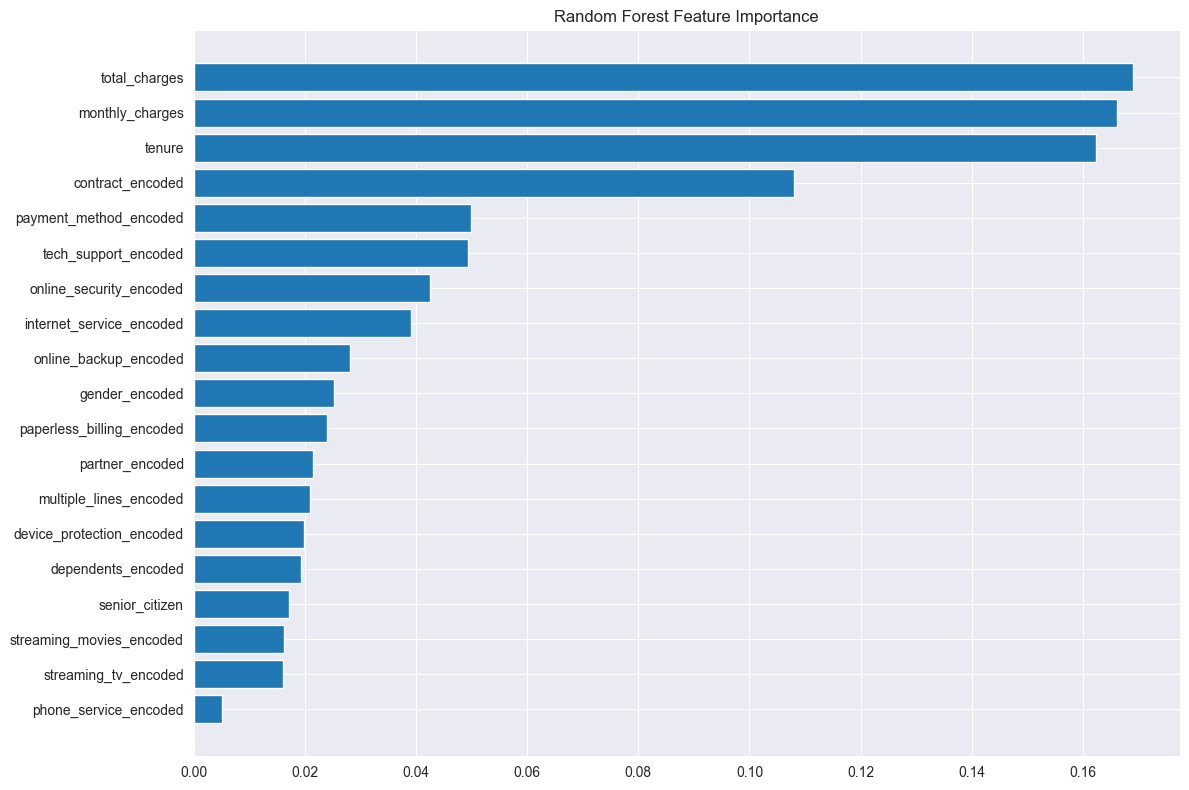

Cross-validation scores: [0.8874092  0.89891041 0.87953995 0.88983051 0.89225182]
Mean CV accuracy: 0.8896
Standard deviation: 0.0063
-------------------------------------------------------------------------------------------------------------------------------


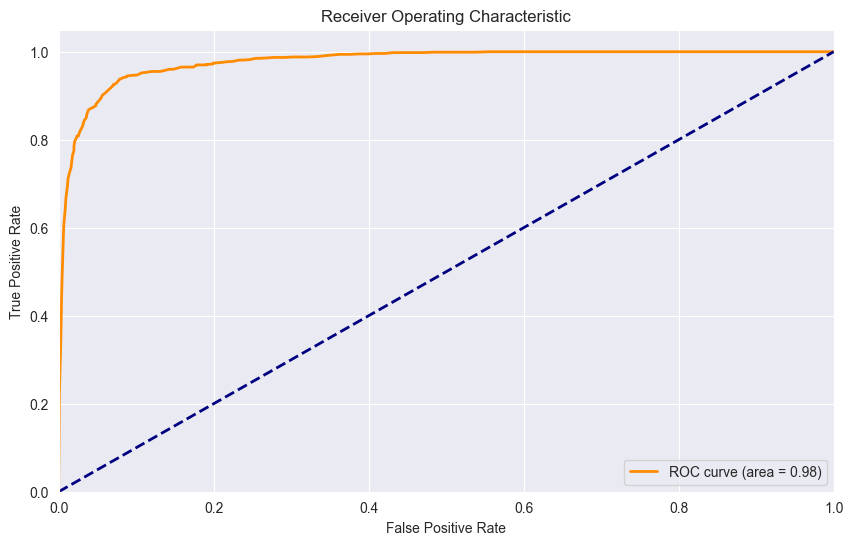

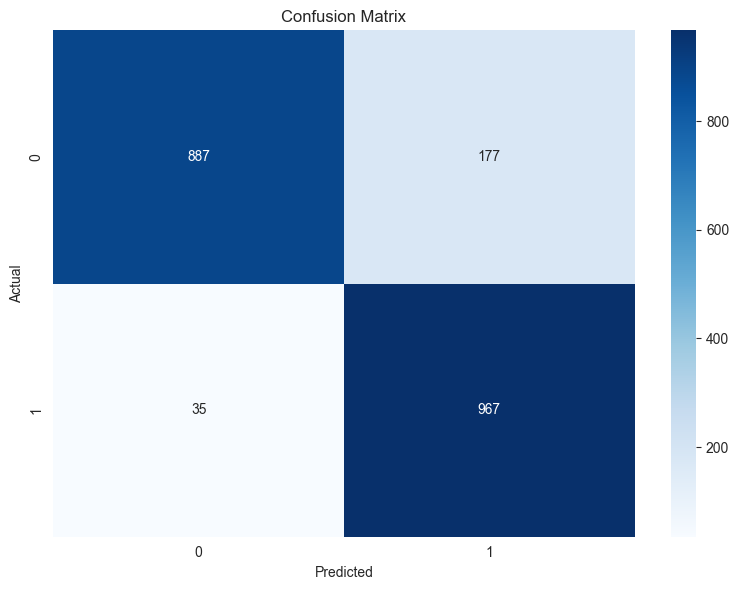

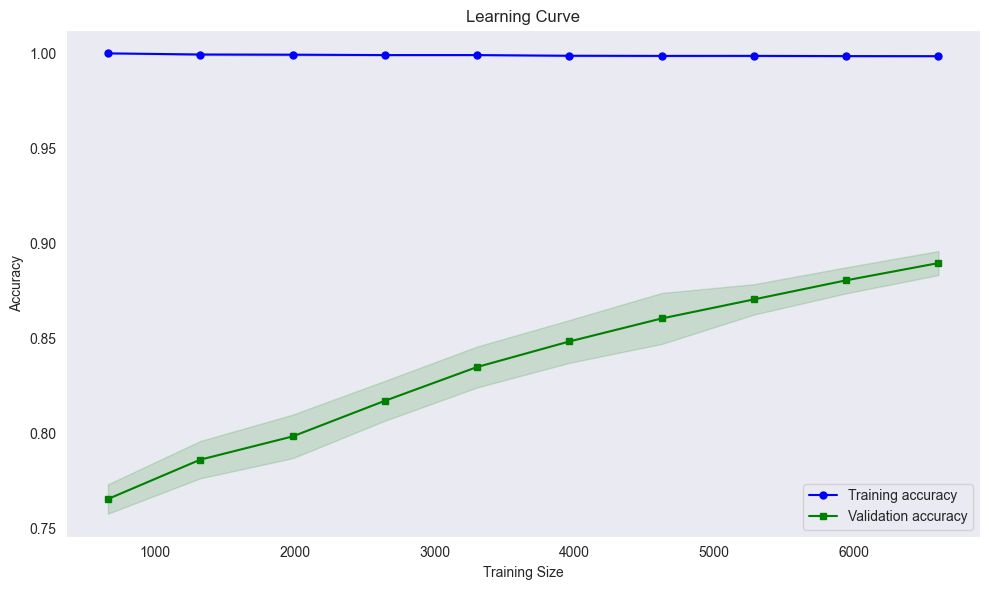

--- Fine-tuning n_estimators ---
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fine-tuned n_estimators: 110
Fine-tuned accuracy: 0.8898
-------------------------------------------------------------------------------------------------------------------------------
--- Final Optimized Model Results ---
Final parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 110}
Accuracy Test: 0.8988
Accuracy Train: 0.9984
Classification Report:

Classification Report Test: 
               precision    recall  f1-score   support

           0       0.96      0.84      0.89      1064
           1       0.85      0.97      0.90      1002

    accuracy                           0.90      2066
   macro avg       0.90      0.90      0.90      2066
weighted avg       0.91      0.90      0.90      2066
 

Classification Report Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4099
           1       1.00      1.0

senior_citizen  tenure  monthly_charges  total_charges  gender_encoded  partner_encoded  dependents_encoded  phone_service_encoded  multiple_lines_encoded  internet_service_encoded  online_security_encoded  online_backup_encoded  device_protection_encoded  tech_support_encoded  streaming_tv_encoded  streaming_movies_encoded  contract_encoded  paperless_billing_encoded  payment_method_encoded  prediction
4139               0      56            25.95        1444.05               1                0                   0                      1                       2                         2                        1                      1                          1                     1                     1                         1                 2                          1                       0           0
1692               0      60            44.45        2773.90               0                0                   0                      0                       1                         0                        2                      0                          2                     0                     0                         2                 1                          1                       2           0
2692               0      18            56.80        1074.65               1                1                   0                      1                       2                         0                        0                      2                          0                     0                     0                         0                 0                          0                       1           0
7704               0       1            20.30          20.30               0                0                   0                      1                       0                         2                        1                      1                          1                     1                     1                         1                 0                          1                       3           1
321                0      68            58.25        3975.70               0                1                   0                      1                       2                         0                        2                      0                          0                     2                     0                         0                 1                          0                       0           0

senior_citizen  tenure  monthly_charges  total_charges  gender_encoded  partner_encoded  dependents_encoded  phone_service_encoded  multiple_lines_encoded  internet_service_encoded  online_security_encoded  online_backup_encoded  device_protection_encoded  tech_support_encoded  streaming_tv_encoded  streaming_movies_encoded  contract_encoded  paperless_billing_encoded  payment_method_encoded  prediction
4139               0      56            25.95        1444.05               1                0                   0                      1                       2                         2                        1                      1                          1                     1                     1                         1                 2                          1                       0           0
1692               0      60            44.45        2773.90               0                0                   0                      0                       1                         0                        2                      0                          2                     0                     0                         2                 1                          1                       2           0
2692               0      18            56.80        1074.65               1                1                   0                      1                       2                         0                        0                      2                          0                     0                     0                         0                 0                          0                       1           0
7704               0       1            20.30          20.30               0                0                   0                      1                       0                         2                        1                      1                          1                     1                     1                         1                 0                          1                       3           1
321                0      68            58.25        3975.70               0                1                   0                      1                       2                         0                        2                      0                          0                     2                     0                         0                 1                          0                       0           0

senior_citizen  tenure  monthly_charges  total_charges  gender_encoded  partner_encoded  dependents_encoded  phone_service_encoded  multiple_lines_encoded  internet_service_encoded  online_security_encoded  online_backup_encoded  device_protection_encoded  tech_support_encoded  streaming_tv_encoded  streaming_movies_encoded  contract_encoded  paperless_billing_encoded  payment_method_encoded  prediction
4139               0      56            25.95        1444.05               1                0                   0                      1                       2                         2                        1                      1                          1                     1                     1                         1                 2                          1                       0           0
1692               0      60            44.45        2773.90               0                0                   0                      0                       1                         0                        2                      0                          2                     0                     0                         2                 1                          1                       2           0
2692               0      18            56.80        1074.65               1                1                   0                      1                       2                         0                        0                      2                          0                     0                     0                         0                 0                          0                       1           0
7704               0       1            20.30          20.30               0                0                   0                      1                       0                         2                        1                      1                          1                     1                     1                         1                 0                          1                       3           1
321                0      68            58.25        3975.70               0                1                   0                      1                       2                         0                        2                      0                          0                     2                     0                         0                 1                          0                       0           0

In [61]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = df_balanced.drop(columns=['churn'], axis=1)
y = df_balanced['churn']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Features and target names
feature_names = X.columns
target_names = ['0', '1']

# Feature scaling (optional for RandomForest but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Basic Random Forest model (baseline)
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_scaled, y_train)
y_pred_base = rf_base.predict(X_test_scaled)
y_pred_base_train = rf_base.predict(X_train_scaled)

print("--- Baseline Random Forest Results ---")
print(f"Accuracy Test set: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Accuracy Train set: {accuracy_score(y_train, y_pred_base_train):.4f}")
print("Classification Report:")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_base, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_base_train, target_names=target_names))
print('-' *127)

# 2. GridSearchCV for hyperparameter tuning
print("--- Grid Search Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use smaller param_grid for demonstration purposes (to avoid long execution time)
small_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=small_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print('-' *127)

# 3. RandomizedSearchCV (more efficient for large parameter spaces)
print("--- Randomized Search Hyperparameter Tuning ---")
random_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None] + list(np.arange(10, 50, 10)),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    random_state=42
)

randomized_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {randomized_search.best_params_}")
print(f"Best cross-validation score: {randomized_search.best_score_:.4f}")
print('-' *127)

# 4. Evaluate the best model from GridSearchCV
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)
y_pred_grid_train = best_grid_model.predict(X_train_scaled)
y_prob_grid = best_grid_model.predict_proba(X_test_scaled)[:, 1]

print("--- Best Grid Search Model Evaluation ---")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_grid_train):.4f}")
print("Classification Report:\n")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_grid, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_grid_train, target_names=target_names))
print('-' *127)

# 5. Feature importance analysis
feature_importances = best_grid_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show()

# 6. Cross-validation of the best model
cv_scores = cross_val_score(best_grid_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *127)

# 7. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_grid)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig('roc_curve.png')
#plt.close()
plt.show()

# 8. Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
#plt.savefig('confusion_matrix.png')
#plt.close()
plt.show()

# 9. Learning curves (optional for deeper analysis)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_grid_model, X_train_scaled, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# 10. Fine-tuning specific parameters (optional based on previous findings)
# For example, fine-tuning n_estimators after discovering optimal ranges
print("--- Fine-tuning n_estimators ---")
estimator_range = np.arange(best_grid_model.n_estimators - 50, best_grid_model.n_estimators + 60, 10)
estimator_range = estimator_range[estimator_range > 0]  # Ensure positive values

param_grid_fine = {
    'n_estimators': estimator_range
}

# Create a new RF with the best parameters from before
rf_fine = RandomForestClassifier(
    random_state=42,
    max_depth=best_grid_model.max_depth,
    min_samples_split=best_grid_model.min_samples_split,
    # Add other parameters from best_grid_model as needed
)

grid_search_fine = GridSearchCV(
    estimator=rf_fine,
    param_grid=param_grid_fine,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search_fine.fit(X_train_scaled, y_train)
print(f"Fine-tuned n_estimators: {grid_search_fine.best_params_['n_estimators']}")
print(f"Fine-tuned accuracy: {grid_search_fine.best_score_:.4f}")
print('-' *127)

# 11. Final model with all optimized parameters
final_params = grid_search.best_params_.copy()
final_params['n_estimators'] = grid_search_fine.best_params_['n_estimators']

final_model = RandomForestClassifier(random_state=42, **final_params)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)
y_pred_final_train = final_model.predict(X_train_scaled)

print("--- Final Optimized Model Results ---")
print(f"Final parameters: {final_params}")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_final_train):.4f}")
print("Classification Report:\n")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_final, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_final_train, target_names=target_names))
print('-' *127)

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred_base, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_grid, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_final, 3)
display(pipe_model_df.head())  

## XGBClassifier

In [ ]:
# 1. Basic Manual Tuning
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Prepare the data
X = df_balanced.drop(columns=['churn'], axis=1)
y = df_balanced['churn']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Basic XGBoost with default parameters
xgb_default = xgb.XGBClassifier(random_state=42)
xgb_default.fit(X_train, y_train)
y_pred = xgb_default.predict(X_test)
y_pred_train = xgb_default.predict(X_train)
print(f"Default accuracy test: {accuracy_score(y_test, y_pred):.4f}")
print(f"Default accuracy train: {accuracy_score(y_train, y_pred_train):.4f}")

# Manual tuning - trying different parameter combinations
xgb_tuned = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_tuned.fit(X_train, y_train)
y_pred_tuned = xgb_tuned.predict(X_test)
y_pred_tuned_train = xgb_tuned.predict(X_train)
print(f"Manually tuned test accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Manually tuned train accuracy: {accuracy_score(y_train, y_pred_tuned_train):.4f}")
print("-" * 127)  

## 2. Grid Search with Cross-Validation
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)
y_pred_grid_train = best_model.predict(X_train)
print(f"Grid search test accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Grid search train accuracy: {accuracy_score(y_train, y_pred_grid_train):.4f}")
print("-" * 127)  

## 3. Randomized Search (More Efficient)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distributions
param_distributions = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)
print("-" * 127)   

## 4. Bayesian Optimization with Optuna
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'random_state': 42,
        'eval_metric': 'logloss'
    }
    
    # Create model and evaluate
    model = xgb.XGBClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best score:", study.best_value)
print("-" * 127)   

# Train final model with best parameters
best_xgb = xgb.XGBClassifier(**study.best_params)
best_xgb.fit(X_train, y_train)

## 5. Progressive Tuning Strategy
# Step 1: Tune number of estimators first
def tune_n_estimators():
    param_grid = {'n_estimators': [50, 100, 200, 300, 500]}
    
    grid_search = GridSearchCV(
        xgb.XGBClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_['n_estimators']

# Step 2: Tune max_depth and learning_rate
def tune_depth_and_lr(n_estimators):
    param_grid = {
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
    }
    
    grid_search = GridSearchCV(
        xgb.XGBClassifier(n_estimators=n_estimators, random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Step 3: Tune regularization and sampling parameters
def tune_regularization(best_params):
    param_grid = {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.1, 0.5, 1],
        'reg_lambda': [0, 0.1, 0.5, 1]
    }
    
    grid_search = GridSearchCV(
        xgb.XGBClassifier(**best_params, random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Execute progressive tuning
best_n_estimators = tune_n_estimators()
print(f"Best n_estimators: {best_n_estimators}")

depth_lr_params = tune_depth_and_lr(best_n_estimators)
print(f"Best depth and learning rate: {depth_lr_params}")
print("-" * 127)   

# Combine parameters
combined_params = {'n_estimators': best_n_estimators}
combined_params.update(depth_lr_params)

final_params = tune_regularization(combined_params)
combined_params.update(final_params)

print(f"Final best parameters: {combined_params}")
print("-" * 127)   

# 6. Using Early Stopping
# Split training data for early stopping
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# XGBoost with early stopping
xgb_early = xgb.XGBClassifier(
    n_estimators=1000,  # Large number
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    early_stopping_rounds=10,
    eval_metric='logloss'
)

# Fit with early stopping
xgb_early.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    verbose=False
)

print(f"Best iteration: {xgb_early.best_iteration}")
print(f"Best score: {xgb_early.best_score}")
print("-" * 127)  

In [62]:
# Best model 
import time

start_time = time.time()

models = {
    'Logistic Regression': lr,
    'Logistic Regression2': best_model,
    'Random Forest Base': rf_base,
    'Random Forest Best Grid': best_grid_model,
    'Random Forest Final Model': final_model
    }

from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_models(models, X, y, cv=5, scoring='accuracy'):
    results = {}
    
    for model_name, model_list in models.items():
        # Handle single models vs lists of models
        if not isinstance(model_list, list):
            model_list = [model_list]
        
        for i, model in enumerate(model_list):
            # Create unique name for each model variant
            name = f"{model_name}_{i}" if len(model_list) > 1 else model_name
            
            # Perform cross-validation
            scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
            results[name] = {
                'mean_score': scores.mean(),
                'std_score': scores.std(),
                'model': model
            }
    
    return results

# Evaluate all models
results = evaluate_models(models, X_train, y_train)

# Find best model
best_model_name = max(results.keys(), key=lambda k: results[k]['mean_score'])
best_model = results[best_model_name]['model']

print(f"Best Model: {best_model_name}")
print(f"Mean CV Score: {results[best_model_name]['mean_score']:.4f}")
print(f"Std CV Score: {results[best_model_name]['std_score']:.4f}")

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution took {execution_time:.4f} seconds")

Best Model: Random Forest Base
Mean CV Score: 0.8897
Std CV Score: 0.0059
Execution took 21.4390 seconds


In [69]:
#df_balanced.to_csv('balanced_telco.csv', index=False)

In [70]:
df.head()

senior_citizen  tenure  monthly_charges  total_charges  churn  gender_encoded  partner_encoded  dependents_encoded  phone_service_encoded  multiple_lines_encoded  internet_service_encoded  online_security_encoded  online_backup_encoded  device_protection_encoded  tech_support_encoded  streaming_tv_encoded  streaming_movies_encoded  contract_encoded  paperless_billing_encoded  payment_method_encoded
0               0       1            29.85          29.85      0               0                1                   0                      0                       1                         0                        0                      2                          0                     0                     0                         0                 0                          1                       2
1               0      34            56.95        1889.50      0               1                0                   0                      1                       0                         0                        2                      0                          2                     0                     0                         0                 1                          0                       3
2               0       2            53.85         108.15      1               1                0                   0                      1                       0                         0                        2                      2                          0                     0                     0                         0                 0                          1                       3
3               0      45            42.30        1840.75      0               1                0                   0                      0                       1                         0                        2                      0                          2                     2                     0                         0                 1                          0                       0
4               0       2            70.70         151.65      1               0                0                   0                      1                       0                         1                        0                      0                          0                     0                     0                         0                 0                          1                       2